# Planetary N-Body Gravitational Simulation

Author: **Marcin Sikorski**<br>
Date: November, 2025

**Introduction**

The **N-body problem** involves predicting the motion of a system of $N$ celestial objects, such as stars or planets, under their mutual gravitational influences (forces). Solving this problem is motivated by the desire to understand the motions of planets, moons, and visible stars. In physics, specifically classical mechanics, the N-body problem is to take the initial positions and velocities (or momenta) of $N$ point masses orbiting each other in space and then to calculate their subsequent trajectories using Newton's laws of motion and Newton's law of universal gravitation.

The two-body problem ($N$ = 2) was completely solved and predicted. Unlike the simpler two-body problem, which has analytical solutions, the N-body problem for $N > 2$ is generally chaotic and must be solved using numerical methods to approximate the results. It is impossible to write down all the terms of general formulas that exactly describe the motion of three or more gravitating objects.

The classical three-body problem is considered unsolvable. We can calculate the orbits incrementally for short timescales, but not foresee the future. The Solar System contains orbits that are only quasi-stable and can decay into chaotic states, leading to potential instability over long timescales. While precise long-term prediction is limited by chaos, the overall structure of the system is expected to remain stable for the Sun's lifetime, with the inner planets exhibiting chaotic yet largely stable motion. The Solar System is basically self-gravitating and stable for seeable future.

The following simulator will depend only on Newtonian mechanics and gravitational forces (no external factors will be included).

**Notebook Content:**
1. Equations of Motion for the N-Body Problem<br>
    1.1. Newton's Second Law<br>
    1.2. Gravitational Force<br>
    1.3. Equations of Motion<br>
    1.4. First-Order Form (State-Space Representation)<br>
2. Introduction and Theoretical Description<br>
    2.1. State Vector<br>
    2.2. Numerical Integration<br>
    2.3. Re-centering the Barycenter<br>
    2.4. Total Energy Conservation<br>
    2.5. Virial Theorem and Virial Equilibrium<br>
    2.6. Linear Momentum Diagnostics<br>
    2.7. Gravitational Effect on the Sun<br>
    2.8. Orbital Characteristics<br>
    2.9. Tidal Acceleration<br>
    2.10. Axial Tilt<br>
    2.11. Lyapunov Exponents<br>
    2.12. Lagrange Points<br>
3. Visualizing Simulation Results
4. Conclusions

### 1. Equations of Motion for the N-Body Problem

The N-body problem models $N$ point masses with positions $r_i$, masses $m_i$, and velocities $v_i$, where $ i = 1, 2, \dots, N $. The motion is governed by Newton's second law and the law of universal gravitation. Below are the fundamental equations of motion derived from these laws.

**1.1. Newton's Second Law**

For each body $i$, the acceleration $a_i$ is given by:

$$ m_i a_i = m_i \frac{d^2 r_i}{dt^2} = F_i $$

where $F_i$ is the total gravitational force acting on body $i$.

**1.2. Gravitational Force**

The gravitational force on body $i$ due to body $j$ (where $j \neq i$) is:

$$ F_{ij} = - \frac{G m_i m_j}{|r_i - r_j|^3} (r_i - r_j) $$

where:
- $G$ is the gravitational constant,
- $r_i$ and $r_j$ are the position vectors of bodies $i$ and $j$,
- $|r_i - r_j|$ is the distance between bodies $i$ and $j$.

The total force on body $i$ is the sum of forces from all other bodies:

$$ F_i = \sum_{j \neq i} F_{ij} = - \sum_{j \neq i} \frac{G m_i m_j}{|r_i - r_j|^3} (r_i - r_j) $$

**1.3. Equations of Motion**

Combining Newton's second law and the gravitational force, the equation of motion for body $i$ is:

$$ \frac{d^2 r_i}{dt^2} = - \sum_{j \neq i} \frac{G m_j}{|r_i - r_j|^3} (r_i - r_j) $$

**1.4. First-Order Form (State-Space Representation)**

The second-order differential equations can be expressed as a system of first-order equations by introducing velocity $v_i = \frac{d r_i}{dt}$:

$$ \frac{d r_i}{dt} = v_i $$

$$ \frac{d v_i}{dt} = - \sum_{j \neq i} \frac{G m_j}{|r_i - r_j|^3} (r_i - r_j) $$

**1.5. In Component Form (3D)**

For a 3D system, let $r_i = (X_i, Y_i, Z_i)$ and $v_i = (v_{X_i}, v_{Y_i}, v_{Z_i})$. The equations for body $i$ are:

$$ \frac{d X_i}{dt} = v_{X_i}, \quad \frac{d Y_i}{dt} = v_{Y_i}, \quad \frac{d Z_i}{dt} = v_{Z_i} $$

$$ \frac{d v_{X_i}}{dt} = - \sum_{j \neq i} \frac{G m_j (X_i - X_j)}{[(X_i - X_j)^2 + (Y_i - Y_j)^2 + (Z_i - Z_j)^2]^{3/2}} $$

$$ \frac{d v_{Y_i}}{dt} = - \sum_{j \neq i} \frac{G m_j (Y_i - Y_j)}{[(X_i - X_j)^2 + (Y_i - Y_j)^2 + (Z_i - Z_j)^2]^{3/2}} $$

$$ \frac{d v_{Z_i}}{dt} = - \sum_{j \neq i} \frac{G m_j (Z_i - Z_j)}{[(X_i - X_j)^2 + (Y_i - Y_j)^2 + (Z_i - Z_j)^2]^{3/2}} $$

**Notes:**
- These equations are a system of $6n$ first-order differential equations (3 for position and 3 for velocity per body).
- As mentioned previously, the system is nonlinear and generally has no closed-form analytical solution for $n \geq 3$, requiring numerical methods for solutions.
- For numerical stability, a softening parameter (softening length) $\epsilon$ is sometimes added to the denominator to avoid singularities: $|r_i - r_j|^2 \to |r_i - r_j|^2 + \epsilon^2$.

### 2. Introduction and Theoretical Description

In addition to the prediction and determination of the orbits of celestial bodies using the equations of motion, the simulation will be enriched with the following issues. Additionally, this is a theoretical description to better understand the implementation of the assumptions.

**2.1. State Vector**

A **state vector** is a mathematical object used to describe the complete condition of a system. In astrodynamics, geodesy, and celestial dynamics, the orbital state vector (or state vector) consists of the position $r$ (Cartesian coordinates $XYZ$) and velocity components $v$ that together with their epoch $t$ uniquely determine the trajectory of the orbiting body in space. It is crucial for predicting orbital trajectories, for instance, of satellites, missiles, or any other body. For two particles $i$ and $j$ in a certain epoch $t$, the state vector is expressed as:

$$ x(t) = [r_{X_i}(t), r_{Y_i}(t), r_{Z_i}(t), r_{X_j}(t), r_{Y_j}(t), r_{Z_j}(t), v_{X_i}(t), v_{Y_i}(t), v_{Z_i}(t), v_{X_j}(t), v_{Y_j}(t), v_{Z_j}(t)] $$

**2.2. Numerical Integration**

The N-body problem is based on ordinary differential equations (ODEs), meaning many differential equations cannot be solved exactly. Choosing an appropriate and suitable numerical method to find numerical approximations (body positions and accelerations) is crucial. Some widely used integration methods in celestial mechanics and astrophysics include: Euler, RK4 (Runge–Kutta 4th order), Richardson, Verlet, or IAS15 (Integrator with Adaptive Step-size control 15th order).

This simulation will use the **leapfrog** technique. A leapfrog integrator is a numerical method for solving the equations of motion for multiple bodies. This method is second order and symplectic, which is preferred over RK4 for simulations of Hamiltonian systems, such as gravitational or orbital dynamics. In comparison, the popular RK4 is more accurate but produces a systematic error over long periods, allowing the system to drift substantially. Additionally, RK4 does not conserve energy. While RK4 offers higher short-term accuracy, leapfrog's long-term stability and accurate representation of physical properties make it superior for understanding the qualitative behavior of these complex systems. It is also lightweight (computational efficiency) and very stable. The time step $dt$ or $\Delta t$ will be adaptive and defined as:

$$ dt = \eta \sqrt{\frac{r_{\text{min}}^3}{G M_{\text{total}}}} $$

where:
- $\eta$ is a dimensionless scaling factor (time step parameter),
- $r_{\text{min}}$ the minimum distance between any pair of particles computed as $ \min_{i \neq j} \sqrt{(X_j - X_i)^2 + (Y_j - Y_i)^2 + (Z_j - Z_i)^2} $,
- $G$ is the gravitational constant,
- $M_{total}$ is the total mass of the system.

**Note:** for numerical issues, we do the following actions:
- try reducing `eta` (e.g., to 0.01) to make the time step smaller, improving accuracy;
- no softening length is fine for planetary orbits (since no close encounters expected) but in case of simulating clusters, a small nonzero value should (e.g., 1e+7 [m]) be set to avoid singularities;
- try another integrator if all actions fail.

**2.3. Re-centering the Barycenter**

In astronomy, the **barycenter** is the combined center of mass of two or more celestial bodies that orbit one another and is the point about which the bodies orbit. A barycenter is a dynamical point, not a physical object, and is not fixed. The common center of mass is located outside the Sun's radius. It changes position due to the orbital movements of the planets. "Re-centering" a barycenter implies shifting a system's reference point to the barycenter itself (shifting the frame of reference). This causes the larger body (the Sun) to appear to "wobble". We determine the position vector of the barycenter $R_{bary}$ and its velocity $V_{bary}$ by taking the weighted average of the positions of all bodies in the system:

$$ R_{bary} = \frac{\sum (m_i r_i)}{M_{total}}, \quad V_{bary} = \frac{\sum (m_i v_i)}{M_{total}} $$

where:
- $m_i$ is the mass of the i-th body,
- $r_i$ is the position vector of the i-th body,
- $v_i$ is the velocity of the i-th body,
- $M_{total}$ is the total mass of the system.

Then we shift all positions and velocities:

$$ r_i \to r_i \to R_{bary}, \quad v_i \to v_i \to V_{bary} $$

**Note:** re-centering every step inside the loop can artificially modify velocities and positions. While good for plotting barycentric orbits, it removes natural drift and breaks strict momentum/energy conservation. For virial checks, we don't recenter inside the loop – only recenter once at initialization.

**2.4. Total Energy Conservation**

In the N-body problem, total energy (total kinetic energy $T$ + total potential energy $V$ or $U$) is a conserved quantity in the absence of external forces, meaning it remains constant over time, according to the principles of classical mechanics. While kinetic and potential energy can transform into each other, their total sum does not change unless external forces add or remove energy from the system. This conservation of total orbital energy is why orbits do not change spontaneously and can be used to calculate orbital speeds, determine orbit shapes, and understand how objects move through space.

For a gravitational N-body system, the **total energy** is the sum of the kinetic energy of all the point masses and their mutual gravitational potential energy, which is given by a specific formula depending on the masses, positions, and velocities of the bodies. **Kinetic energy** is the energy of motion for each body and **potential energy** is the energy stored in the system due to the interactions between the bodies. For a gravitational N-body system, the potential energy depends on the masses of the bodies and the distances between them. For a system of $N$ particles with masses $m_i$, positions $r_i$, and velocities $v_i$, the Hamiltonian (the total energy) can be written as:

$$ H = T + V = \sum_i \left( \frac{1}{2} m_i v_i^2 \right) + \sum_{i<j} \frac{G m_i m_j}{|r_i - r_j|} $$

where:
- $\sum_i$ represents the sum over all bodies ($i$),
- $\sum_{i < _j}$ represents the sum over all unique pairs of bodies ($i$, $j$),
- $m_i$ is the mass of the i-th body,
- $v_i$ is the velocity of the i-th body,
- $G$ is the gravitational constant,
- $r_i$ is the position vector of the i-th body,
- $|r_i - r_j|$ is the Euclidean distance between bodies $i$ and $j$.

Tracking energy is a key quantity to monitor in N-body simulations. Because the energy is conserved, a well-tuned simulation should show minimal drift in its total energy over time. A significant deviation can indicate errors in the simulation's numerical methods or the integration algorithms.

**2.5. Virial Theorem and Virial Equilibrium**

A realistic N-body simulation of the planets in our Solar System should satisfy the virial theorem and remain in virial equilibrium. The Solar System is a stable, gravitationally bound system where the time-averaged kinetic energy $T$ and potential energy $V$ follow the relation:

$$ 2 \langle T \rangle + \langle V \rangle = 0 $$

or equivalently:

$$ \langle T \rangle = - \frac{1}{2} \langle V \rangle $$

as required by the virial theorem for self-gravitating systems in equilibrium. This holds because the planets' orbits are bounded and the system has been dynamically stable for billions of years, with negligible energy loss or external perturbations on short timescales like 30 years.

For conserved energy, the virial ratio should stay close to 1 (indicating equilibrium) over the time period. Deviations might occur due to numerical errors, incomplete modeling (e.g., ignoring general relativity or smaller bodies), or if the simulation isn't run long enough for averaging. For the Solar System, equilibrium is effectively pre-established rather than something that needs to "relax" like in galaxy simulations.

To verify virial theorem we will check if:

$$ \frac{T}{|V|} \approx 0.5 $$

over multiple time steps. For a short 30-80 year simulation, we can average over the output time series. If the virial ratio:

$$ \frac{2T + V}{|V|} \approx 0 $$

or $$ \frac{2T}{|V|} \approx 1 $$

the system is in virial equilibrium.

**2.6. Linear Momentum Diagnostics**

In celestial mechanics, the conservation of linear and angular momentum serves as a crucial verification tool for the accuracy of numerical simulations, not as an inherent constraint. If the simulation's computed momentum fails to remain constant over time, it indicates errors or issues within the integration algorithm, signifying a problem in how the system's dynamics are being modeled. Momentum is a vector, so its direction matters, and it can change in both magnitude and direction. The total momentum of the i-th body in a given epoch $t$ can be written as:

$$ P(t) = \sum_i p_i(t) = \sum_i m_i v_i(t) $$

With momentum we can track the barycenter's (center-of-mass) decomposition: drift and speed.

**2.7. Gravitational Effect on the Sun**

According to Newton's law of universal gravitation, every object in the universe with mass exerts a gravitational pull on every other object. Just as the Sun's gravity pulls on the planets, the planets also exert their own gravitational tug on the star. The celestial bodies that pull on the Sun the most (causing it to drift or wobble around the barycenter) can be determined by calculating the average magnitude of each body's contribution to the Sun's displacement over time. This is approximated as:

$$ \frac{m_i}{M_{☉}} \times |r_i| $$

where:
- $m_i$ is the mass of the i-th body,
- $M_{☉}$ is the Sun's mass,
- $|r_i|$ is the magnitude of the body's position vector relative to the barycenter, averaged over the simulation.

This effect is very small because the planets are significantly less massive than the Sun. While the Sun's strong gravitational pull keeps the planets in their orbits, the presence of planets helps to shape and stabalize the orbits of other objects (dust, gas, satellites).

**2.8. Orbital Characteristics**

This simulation will introduce a function to describe a body's classical orbital elements across the simulation and how they change with time. Orbital elements can be obtained from state vectors (position and velocity vectors along with time and magnitude of acceleration). To compute them, we need the planet's specific orbital energy with respect to the Sun. The orbital mechanics relation for **semi-major axis** $a$ is:

$$ a = - \frac{G M_{☉}}{2 \epsilon} $$

where:
- $\epsilon = \frac{v^2}{2} - \frac{G M_{☉}}{r}$ is the specific orbital energy of the planet relative to the Sun,
- $v$ is the body's speed relative to the Sun,
- $r$ is the body's Euclidean distance from the Sun's center of mass.

The **eccentricity** vector $\vec{e}$ is defined as:

$$ \vec{e} = \frac{\vec{v} \times \vec{h}}{\mu} - \frac{\vec{r}}{|\vec{r}|} $$

where:
- $\vec{h} = \vec{r} \times \vec{v}$ is the specific angular momentum,
- $\mu \approx G (M_{☉} \times m_{body})$.

Then:

$$ e = |\vec{e}| $$

The **semi-minor axis** $b$ is determined as follows:

$$ b = 1 \sqrt{1 - e^2} $$

The **semi-parameter** (or semi-latus rectum) $p$ also describes the size and the shape of an orbit. It is the width of the orbit at the primary focus (at a true anomaly of $\pi/2$, or 90°). For elliptical orbits ($e < 1$), the semi-latus rectum is calculated as:

$$ p = a \cdot (1 - e^2) $$

For parabolic or hyperbolic orbits ($e \geq 1$), we use:

$$ p = \frac{h^2}{\mu} $$

where $h$ is the angular momentum and $\mu$ is the gravitational parameter.

The orbital **inclination** – the angle between the orbital plane and a reference plane (here: the Solar System's reference $XY$-plane, ecliptic), is derived from the angular momentum vector as:

$$ i = \text{arccos} \left( \frac{h_Z}{|\vec{h}|} \right) $$

where:
- $h_Z$ is the $Z$-component of angular momentum,
- $|\vec{h}|$ is the magnitude of $\vec{h}$.

For an object in an eccentric (or elliptical) orbit orbiting a much larger body, the instantaneous **orbital speed** at any point is given by the vis-viva equation:

$$ v = \sqrt{\mu \left( \frac{2}{r} - \frac{1}{a} \right)} $$

The **longitude of the periapsis** $\overline{\omega}$ describes the angle between the vernal point and the periapsis, measured in the reference plane (ecliptic). It is the sum of the longitude of the ascending node $\Omega$ and the argument of periapsis $\omega$. We start from computing the longitude of the ascending node using the node vector:

$$ \vec{n} = \vec{z} \times \vec{h} $$

where $\vec{z}$ is the $Z$-axis $[0, 0, 1]$. Next:

$$ \Omega = \text{arccos} \left( \frac{n_X}{|\vec{n}|} \right) $$

A quadrant check based on the sign of $n_Y$. If $n_Y \geq 0$, then $n$ must be pointing to the first or second quadrant and $0° \leq \Omega \leq 180°$. If $n_Y < 0$, then $n$ must be pointing to the third or fourth quadrant, so $180° < \Omega < 360°$. We can express this fully with the conditions in:

$$
\begin{split}
\Omega = \begin{cases}
\text{arccos} \left( \frac{n_X}{|\vec{n}|} \right) & n_Y \geq 0 \\
2\pi - \text{arccos} \left( \frac{n_X}{|\vec{n}|} \right) & n_Y < 0
\end{cases}
\end{split}
$$

For equatorial orbits ($n = 0$), $\Omega$ is undefined and set to 0. The argument of periapsis $\omega$ is computed as:

$$ \omega = \text{arccos} \left( \frac{\vec{n} \cdot \vec{e}}{|\vec{n}| |\vec{e}|} \right) $$

A quadrant check is performed using the sign of $e_Z$. If $e_Z \geq 0$, then $e$ points up and periapsis must be between the ascending node and descending node, so $0° \leq \omega \leq 180°$. On the other hand, if $e_Z < 0$, then periapsis must be between the descending and ascending nodes, and $180° < \omega < 360°$. We can express this fully with the conditions in:

$$
\begin{split}
\omega = \begin{cases}
\text{arccos} \left( \frac{\vec{n} \cdot \vec{e}}{|\vec{n}| |\vec{e}|} \right)) & e_Z \geq 0 \\
2\pi - \text{arccos} \left( \frac{\vec{n} \cdot \vec{e}}{|\vec{n}| |\vec{e}|} \right)) & e_Z < 0
\end{cases}
\end{split}
$$

For circular orbits ($e = 0$) or equatorial orbits, $\omega$ is undefined and set to 0. Finally, the longitude of the periapsis is:

$$ \overline{\omega} = \omega + \Omega $$

**Note:** classical Keplerian elements are usually determined with respect to the Sun's body center, not the Solar System's center of mass. This means that our calculated parameters will slightly differ due to different coordinate centers.

**2.9. Tidal Acceleration**

Tidal effects are distortions or forces caused by the difference in gravitational pull across an object's body, most famously seen as the high and low tides in Earth's oceans due to the Moon's and Sun's gravitational forces. These forces stretch and compress celestial bodies, which can lead to phenomena like tidal locking, tidal heating, tidal acceleration, and even the destruction of objects in strong gravitational fields. Tidal influences are observed periodically. **Tidal acceleration** describes the gradual change in a celestial body's orbital and rotational motion caused by the differential gravitational forces of other bodies. For a body $i$ (radius $R_i$) experiencing tides from a perturber $j$ (mass $M_j$, distance $r$) the tidal acceleration at the surface of $i$ is approximately:

$$ a_{tidal} \approx 2 G M_j \frac{R_i}{r^3} $$

We will implement a function that will compute standard tidal acceleration influenced by the Sun on other bodies (solar tidal effects). The standard tidal acceleration is:

$$ a_{tidal} = \frac{2 G M_j R_i}{r^3} \hat{r}_{ij} $$

where:
- $M_j$ is the mass of the perturbing body (the Sun),
- $R_i$ is the radius of body $i$ (distance from its center to the evaluation point),
- $r$ is the distance between the Sun and body $i$,
- $\hat{r}_{ij}$ is the unit vector from body $i$ to body $j$.

We will introduce a softening parameter to prevent division by zero when $r$ is very small. A tiny value ($10^{-10}$) is small enough to be negligible for Solar System scales. The unit vector $\hat{r}_{ij}$ normalizes and ensures the tidal acceleration is a vector in the correct direction.

**2.10. Axial Tilt**

The simulation will introduce a function to monitor a body's axial tilt evolution. A planet's axial tilt changes over time due to gravitational interactions with other celestial bodies, a process known as Milankovitch cycles. Other factors, like the distribution of mass on a planet's surface or tidal force can also cause changes in axial tilt. The **axial tilt** (or **obliquity**) is the angle between a planet's rotational axis and its orbital plane's normal vector (orbital angular momentum vector) perpendicular to the orbit. To compute the obliquity, we need to provide additional information about the planet's rotational axes or spin orientations. Usually the planet's pole orientation, with respect to the ecliptic, is described by right ascension (RA or $\alpha$) and declination (dec or $\delta$). For the body, we start from computing its specific angular momentum vector relative to the Sun:

$$ \vec{h} = \vec{r} \times \vec{v} $$

where $\vec{r}$ is the position vector and $\vec{v}$ is the velocity vector of the body relative to the Sun. The normal to the orbital plane is:

$$ \hat{h} = \frac{\vec{h}}{|\vec{h}|} = \frac{\vec{r} \times \vec{v}}{|\vec{h}|} $$

We then obtain the spin axis vector $\hat{s}$, which is a unit vector in 3D space pointing along the body's north pole (the direction of its rotation axis):

$$ \hat{s} =
\begin{bmatrix}
\cos \delta \cos \alpha, \cos \delta \sin \alpha, \sin \alpha
\end{bmatrix}
$$

where $\alpha$ is the right ascension (RA) of the pole, $\delta$ is the declination (dec), both in the J2000.0 equatorial frame. Right now the formula above gives $\hat{s}$ in the equatorial J2000.0 frame. But the positions and velocities are in the ecliptic J2000.0 frame. So we need to rotate about the $X$-axis by the obliquity of the ecliptic ($\epsilon$ ≈ 23.4392911°). The rotation matrix is:

$$
R =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos \epsilon & \sin \epsilon \\
0 & -\sin \epsilon & \cos \epsilon
\end{bmatrix}
$$

so:

$$ \hat{s}_{ecl} = R \cdot \hat{s}_{eq} $$

Finally, the obliquity $\theta$ is the angle between the orbital plane's normal $\hat{h}$ and the spin axis $\hat{s}$ after rotation:

$$ \theta = \arccos\left(\hat{h} \cdot \hat{s} \right) $$

We compute the obliquity of a body relative to its orbital plane (for planets). For the Sun, it is relative to the Solar System's invariable plane.

**Note:** both the International Astronomical Union (IAU) and JPL NASA publish standard pole orientations ($\alpha$, $\delta$) for planets and moons. Applying the right-hand rule (not in this simulation) will return inverted values for retrograde bodies, e.g. 177.36° instead of 2.64° for Venus, and 97.77° instead of 82.23° for Uranus. That's because the right-hand rule considers the direction of the body's north pole.

**2.11. Lyapunov Exponents**

These exponents are another elements to study system stability to quantify the chaotic nature of planetary orbits. A fundamental difference between stable and unstable planetary orbits is that two nearby trajectories in phase space will diverge following a power law (usually linear) for the former and exponentially for the latter. The Solar System is weakly chaotic, and the **Lyapunov exponent** measures the rate of exponential divergence or convergence nearby trajectories, indicating stability timescales. To estimate Lyapunov exponents we want to evolve two nearby trajectories in parallel and measure how their separation grows. If the separation grows (on average) like:

$$ d(t) \sim d(0) e^{\lambda t} $$

then $\lambda$ is the largest Lyapunov exponent. A positive Lyapunov exponent signifies that orbits diverge exponentially, leading to chaotic motion and instability, while a non-positive exponent suggests stable (quasi-stable) or regular orbits. This tool is also used to identify regions of chaotic behavior and predict long-term orbital evolution.

To compute exponents, we initialize a perturbed copy of your initial state (tiny random displacement). With the same integrator we evolve both systems in parallel. During the loop phase space separations are measured regularly. We then renormalize separation to prevent overflow (classic Benettin algorithm) and accumulate exponent estimates (e.g., ~5 Myr). Finally, values of the largest Lyapunov exponents are examined. Log-distance function to plot:

$$ \frac{\log(d(t))}{d(0)} $$

**2.12. Lagrange Points**

**Lagrange points** (or libration points) are five specific locations in space where the gravitational forces of a two-body system (like the Sun–Earth) and the centripetal force on a third, smaller object balance each other, allowing the smaller object to stay in a fixed position relative to the two larger bodies with minimal fuel. In practice, these points are critical for spacecraft, as they act as cosmic and stable "parking spots" for telescopes and other scientific instruments, enabling continuous observation with much lower energy requirements, allowing them to remain in place for long-term missions. Mathematically, this involves the solution of the circular restricted three-body problem (CR3BP). This is an approximation because the full N-body system includes perturbations from all bodies and non-circular orbits, but for dominant pairs like the Sun and a planet (where the mass ratio $\mu$ is small), it works well for estimating the equilibrium points at a given snapshot in time.

For any combination of two orbital bodies, there are five Lagrangian points, $L_1$ to $L_5$, all in the orbital plane of the two large bodies. For example, there are five Lagrange points for the Sun–Earth system, and five different Lagrange points for the Earth–Moon system. $L_1$, $L_2$, and $L_3$ are on the line through the centers of the two large bodies, while $L_4$ and $L_5$ each act as the third vertex of an equilateral triangle formed with the centers of the two large bodies.

- $L_1$: Located between the two larger bodies (e.g., between the Sun and Earth).
- $L_2$: Located beyond the smaller body (e.g., on the far side of Earth from the Sun).
- $L_3$: Located on the opposite side of the larger body from the smaller body (e.g., on the opposite side of the Sun from Earth).
- $L_4$: Leads the smaller body in its orbit around the larger body.
- $L_5$: Follows the smaller body in its orbit.

The five libration points rotate with the system as it revolves. Lagrange points $L_1$, $L_2$, and $L_3$ are unstable. Objects placed there will drift, and the more they drift, the stronger the forces will be to move them further away. Satellites placed in these locations need assistance to remain on station. $L_4$ and $L_5$ are stable locations and objects placed there will tend to remain there.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt
import time

# constants
G = 6.674328e-11          # gravitational constant [m³·kg⁻¹·s⁻²]
dt = 3600.0               # ~1 hour, initial time step [s]
sid_year = 31_558_149.8   # sidereal year [s]
t_total = 0.0             # start
#t_end = 80 * sid_year     # ~80 years
#t_end = 100 * sid_year    # ~100 years
t_end = 170 * sid_year    # ~170 years
softening_length = 0.0    # softening length [m]
eta = 0.02                # adaptive time step scaling
AU = 149_597_870_700.0    # 1 AU [m]

# celestial bodies for N-body simulation
planet_names = [
    'Earth', 'Mars', 'Mercury', 'Sun', 'Venus',
    'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto',
]

# data source     : https://ssd.jpl.nasa.gov/horizons/app.html
# reference frame : Ecliptic of J2000.0
# start time      : A.D. 2025-Aug-09 00:00:00.0000 TDB
# center body name: Solar System Barycenter (not the center mass of the Sun)

# masses [kg]
m = np.array([
    5.97219e+24,  # Earth
    6.4171e+23,   # Mars
    3.3020e+23,   # Mercury
    1988410e+24,  # Sun (Sol)
    48.685e+23,   # Venus
    18.9819e+26,  # Jupiter
    5.6834e+26,   # Saturn
    86.813e+24,   # Uranus
    102.409e+24,  # Neptune
    1.307e+22,    # Pluto (134340)
], dtype=np.float64)


# --- celestial body ephemeris
# initial positions - XYZ Cartesian components of position vectors [m]
rx = np.array([
    1.090813919968579e+8,
    -2.140123398138087e+8,
    5.232262485033288e+7,
    -6.178406272887982e+5,
    7.771682312264957e+7,
    -9.274787306842114e+7,
    1.426590735013521e+9,
    1.551151714669755e+9,
    4.469443671661140e+9,
    2.816765962491515e+9,
], dtype=np.float64) * 1e3

ry = np.array([
    -1.055421705737353e+8,
    -1.106803064611604e+8,
    -2.197655851572553e+7,
    -8.153323477372926e+5,
    7.370846820367463e+7,
    7.654595222319965e+8,
    -8.297434054927930e+7,
    2.472093530724881e+9,
    8.311245751568668e+6,
    -4.458335666291879e+9,
], dtype=np.float64) * 1e3

rz = np.array([
    2.857075072482973e+4,
    2.953272310868263e+6,
    -6.562356976267426e+6,
    2.268899931029172e+4,
    -3.473411246943835e+6,
    -1.099111782945335e+6,
    -5.535760724005157e+7,
    -1.091418356110978e+7,
    -1.031740572111823e+8,
    -3.377065759659424e+8,
], dtype=np.float64) * 1e3


# initial velocities - XYZ components of velocity vectors [m/s]
vx = np.array([
    2.009063177968137e+1,
    1.201075023089883e+1,
    8.597649153947520e+0,
    1.277195985961960e-2,
    -2.423367613895920e+1,
    -1.312471891019328e+1,
    2.510323313481696e-2,
    -5.818553241880918e+0,
    -4.645835998723005e-2,
    4.752171994966313e+0,
], dtype=np.float64) * 1e3

vy = np.array([
    2.142346835953295e+1,
    -1.947242252254514e+1,
    4.742941919571564e+1,
    -2.398027845951023e-3,
    2.522099606696869e+1,
    -9.505827634841233e-1,
    9.622079932632234e+0,
    3.302052870619835e+0,
    5.467775296776533e+0,
    1.692278074407323e+0,
], dtype=np.float64) * 1e3

vz = np.array([
    -2.570027068773406e-3,
    -7.024743336531412e-1,
    3.088588699981567e+0,
    -2.386499549386676e-4,
    1.745314368677116e+0,
    2.975754288166267e-1,
    -1.679638365963290e-1,
    8.754420031420262e-2,
    -1.108427054912071e-1,
    -1.576125713336346e+0,
], dtype=np.float64) * 1e3


# north pole orientations - RA (right ascension) & Dec (declination) [°]
pole_orient = np.array([
    [0.00, 90.00],
    [317.65317, 52.87058],
    [281.00190, 61.41425],
    [286.13000, 63.87000],
    [272.76000, 67.16000],  # retrograde
    [268.05775, 64.49670],
    [40.57978, 83.53598],
    [257.31100, -15.17500], # retrograde
    [299.49649, 42.95979],
    [132.99300, -6.16300],
], dtype=np.float64)


# planet radii (vol. mean radii) [m]
planet_radii = np.array([
    6371.01,   # Earth
    3389.92,   # Mars
    2439.40,   # Mercury
    695700,    # Sun (Sol)
    6051.84,   # Venus
    69911,     # Jupiter
    58232,     # Saturn
    25362,     # Uranus
    24624,     # Neptune
    1188.3,    # Pluto (134340)
], dtype=np.float64) * 1e3

# number of celestial bodies
N = m.shape[0]

# assertions
assert len(planet_names) == N
assert rx.shape[0] == ry.shape[0] == rz.shape[0] == N
assert vx.shape[0] == vy.shape[0] == vz.shape[0] == N
assert pole_orient.shape[0] == N
assert planet_radii.shape[0] == N

In [ ]:
# how much mass does each body contain of the Solar System?
from prettytable import PrettyTable

# total mass of the system [kg]
M_total = np.sum(m)

table = PrettyTable(['Celestial Body', 'Solar System Mass [%]'])

for i, j in zip(range(N), planet_names):
    table.add_row([j, round((100 * m[i]) / M_total, 4)])

# sort the table by mass in descending order
table.sortby = 'Solar System Mass [%]'
table.reversesort = True

print(table)

+----------------+-----------------------+
| Celestial Body | Solar System Mass [%] |
+----------------+-----------------------+
|      Sun       |         99.866        |
|    Jupiter     |         0.0953        |
|     Saturn     |         0.0285        |
|    Neptune     |         0.0051        |
|     Uranus     |         0.0044        |
|     Earth      |         0.0003        |
|     Venus      |         0.0002        |
|     Pluto      |          0.0          |
|    Mercury     |          0.0          |
|      Mars      |          0.0          |
+----------------+-----------------------+


> The Sun is truly enormous and contains almost all of the mass in the Solar System. The Sun's mass is so significant that it dwarfs the combined mass of all other objects in the system. It's immense mass creates a strong gravitational field and allows for a stable and ordered system.

In [ ]:
# --- helper functions
# -------------------------------
# 1. function to re-center to barycenter
# -------------------------------
def recenter_to_barycenter(state, masses):
    state_reshaped = state.reshape(N, 6)
    pos = state_reshaped[:, 0:3]
    vel = state_reshaped[:, 3:6]
    M_total = np.sum(masses)
    r_bary = np.sum(pos * masses[:, None], axis=0) / M_total
    v_bary = np.sum(vel * masses[:, None], axis=0) / M_total
    pos -= r_bary
    vel -= v_bary

    return state_reshaped.reshape(-1)

# -------------------------------
# 2. compute accelerations
# -------------------------------
def compute_accelerations(state, masses):
    acc = np.zeros(3 * N, dtype=np.float64)

    for i in range(N):
        ax = ay = az = 0.0
        for j in range(N):
            if i != j:
                dx = state[6*j] - state[6*i]
                dy = state[6*j + 1] - state[6*i + 1]
                dz = state[6*j + 2] - state[6*i + 2]
                r_squared = dx**2 + dy**2 + dz**2
                r = math.sqrt(r_squared + softening_length**2)

                factor = G * masses[j] / (r**3)
                ax += factor * dx
                ay += factor * dy
                az += factor * dz

        acc[3*i] = ax
        acc[3*i + 1] = ay
        acc[3*i + 2] = az

    return acc

# -------------------------------
#  3. compute energies: kinetic & potential
# -------------------------------
def compute_energy(state, masses):
    kinetic = 0.0
    potential = 0.0

    for i in range(N):
        vx = state[6*i + 3]
        vy = state[6*i + 4]
        vz = state[6*i + 5]
        kinetic += 0.5 * masses[i] * (vx**2 + vy**2 + vz**2)

        for j in range(i+1, N):
            dx = state[6*j] - state[6*i]
            dy = state[6*j + 1] - state[6*i + 1]
            dz = state[6*j + 2] - state[6*i + 2]
            r = math.sqrt(dx**2 + dy**2 + dz**2 + softening_length**2)
            potential -= G * masses[i] * masses[j] / r

    return kinetic / 1e6, potential / 1e6  # convert [J] --> [MJ]

# -------------------------------
# 4. compute orbital characteristics relative to Sun
# -------------------------------
def compute_orbital_elements(state, masses, body_index, sun_index):
    # position & velocity relative to Sun
    r_vec = state[6*body_index:6*body_index+3] - state[6*sun_index:6*sun_index+3]
    v_vec = state[6*body_index+3:6*body_index+6] - state[6*sun_index+3:6*sun_index+6]

    r = np.linalg.norm(r_vec)
    v = np.linalg.norm(v_vec)

    mu = G * (masses[sun_index] + masses[body_index])

    # orbital angular momentum
    epsilon = 0.5 * v**2 - mu / r

    if epsilon >= 0:
        # not bound
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        # semi-major axis [m]
        a = -mu / (2 * epsilon)

        # angular momentum
        h_vec = np.cross(r_vec, v_vec)
        h = np.linalg.norm(h_vec)

        # eccentricity vector
        e_vec = (np.cross(v_vec, h_vec) / mu) - (r_vec / r)
        e = np.linalg.norm(e_vec)

        # semi-minor axis [m]
        b = a * np.sqrt(1 - e**2) if e < 1 else np.nan

        # semi-parameter (semi-latus rectum) [m]
        p = a * (1 - e**2) if e < 1 else h**2 / mu

        # inclination [rad]
        i = np.arccos(h_vec[2] / h)

        # instantaneous orbital speed [m/s]
        v = np.sqrt(mu * (2/r - 1/a))

        # --- longitude of the periapsis [rad]
        # compute the node vector (line of nodes)
        z_axis = np.array([0, 0, 1], dtype=np.float64)
        n_vec = np.cross(z_axis, h_vec)
        n = np.linalg.norm(n_vec)

        # longitude of the ascending node (Ω) [rad]
        if n < 1e-10:  # small norm indicates near-equatorial orbit
            Omega = 0.0
        else:
            n_vec = n_vec / n  # normalize node vector
            Omega = np.arctan2(n_vec[1], n_vec[0])  # use arctan2 for full [0, 2π] range
            if Omega < 0:
                Omega += 2 * np.pi

        # argument of periapsis (ω) [rad]
        if e < 1e-10 or n < 1e-10:  # circular or equatorial orbit
            omega = 0.0
        else:
            e_vec = e_vec / e  # normalize eccentricity vector
            cos_omega = np.clip(np.dot(n_vec, e_vec), -1.0, 1.0)  # avoid numerical errors
            omega = np.arccos(cos_omega)
            if e_vec[2] < 0:
                omega = 2 * np.pi - omega

        # longitude of the periapsis (ω + Ω) [rad]
        long_periapsis = Omega + omega
        if long_periapsis > 2 * np.pi:
            long_periapsis -= 2 * np.pi  # keep in [0, 2π]

        return a, e, b, p, i, v, long_periapsis

In [ ]:
# -------------------------------
# 5a. adaptive time step (optional)
# -------------------------------
def adaptive_dt(state, masses, eta):
    """
    Uses local acceleration. Higher accuracy, but runs very slow
    and is computationally expensive.
    """
    acc = compute_accelerations(state, masses)
    acc_max = np.max(np.sqrt(acc[0::3]**2 + acc[1::3]**2 + acc[2::3]**2))

    return eta * np.sqrt(1.0 / acc_max) if acc_max > 0 else dt

# -------------------------------
# 5b. adaptive time step
# -------------------------------
def adaptive_dt(state, masses, eta):
    """
    Less accurate and much faster, but accurate enough for this simulation.
    """
    min_r = float('inf')

    for i in range(N):
        for j in range(i+1, N):
            dx = state[6*j] - state[6*i]
            dy = state[6*j + 1] - state[6*i + 1]
            dz = state[6*j + 2] - state[6*i + 2]
            r = math.sqrt(dx**2 + dy**2 + dz**2)
            min_r = min(min_r, r)
    M_total = np.sum(masses)

    return eta * math.sqrt(min_r**3 / (G * M_total))

# -------------------------------
# 5c. leapfrog integration step
# -------------------------------
def leapfrog_step(state, dt, masses, acc_current):
    new_state = np.copy(state)

    for i in range(N):
        new_state[6*i + 3] += 0.5 * dt * acc_current[3*i]
        new_state[6*i + 4] += 0.5 * dt * acc_current[3*i + 1]
        new_state[6*i + 5] += 0.5 * dt * acc_current[3*i + 2]

    for i in range(N):
        new_state[6*i]     += dt * new_state[6*i + 3]
        new_state[6*i + 1] += dt * new_state[6*i + 4]
        new_state[6*i + 2] += dt * new_state[6*i + 5]

    acc_new = compute_accelerations(new_state, masses)

    for i in range(N):
        new_state[6*i + 3] += 0.5 * dt * acc_new[3*i]
        new_state[6*i + 4] += 0.5 * dt * acc_new[3*i + 1]
        new_state[6*i + 5] += 0.5 * dt * acc_new[3*i + 2]

    return new_state, acc_new

In [ ]:
# -------------------------------
# 6a. convert RA/dec to the ecliptic J2000.0 frame
# -------------------------------
def spin_axis_vector(ra_deg, dec_deg, obliquity_deg=23.4392911):
    ra = np.radians(ra_deg)
    dec = np.radians(dec_deg)
    eps = np.radians(obliquity_deg)

    # equatorial components
    s_eq = np.array([
        np.cos(dec) * np.cos(ra),
        np.cos(dec) * np.sin(ra),
        np.sin(dec)
    ])

    # rotate to ecliptic J2000.0
    R = np.array([
        [1, 0, 0],
        [0,  np.cos(eps), np.sin(eps)],
        [0, -np.sin(eps), np.cos(eps)],
    ])

    s_ecl = R @ s_eq
    return s_ecl / np.linalg.norm(s_ecl)

# -------------------------------
# 6b. compute obliquity relative to Sun or invariable plane
# -------------------------------
def compute_obliquity(state, s_hat, body_index, sun_index):
    if body_index == sun_index:
        # for the Sun, compute tilt relative to the Solar System's total angular momentum
        total_h_vec = np.zeros(3)
        state_resh = state.reshape(-1, 6)
        for i in range(N):
            r_vec = state_resh[i, 0:3]
            v_vec = state_resh[i, 3:6]
            h_vec_i = m[i] * np.cross(r_vec, v_vec)  # mass-weighted angular momentum
            total_h_vec += h_vec_i

        h = np.linalg.norm(total_h_vec)
        if h == 0:
            return np.nan

        # normal to the invariable plane
        h_hat = total_h_vec / h

        # obliquity: angle between Sun's spin axis and invariable plane normal
        tilt = np.arccos(np.clip(np.dot(h_hat, s_hat), -1.0, 1.0))
        return tilt
    else:
        # for planets, compute tilt relative to orbital plane around the Sun
        r_vec = state[6*body_index:6*body_index+3] - state[6*sun_index:6*sun_index+3]
        v_vec = state[6*body_index+3:6*body_index+6] - state[6*sun_index+3:6*sun_index+6]

        # orbital angular momentum
        h_vec = np.cross(r_vec, v_vec)
        h = np.linalg.norm(h_vec)

        if h == 0:
            return np.nan

        # orbital plane normal
        h_hat = h_vec / h

        # obliquity: angle between spin axis and orbital plane normal
        tilt = np.arccos(np.clip(np.dot(h_hat, s_hat), -1.0, 1.0))
        return tilt

In [ ]:
# -------------------------------
# 7a. helper to compute tidal acceleration
# -------------------------------
def tidal_acceleration(state, masses, body_i, body_j, R_i, softening=1e-10):
    """
    Compute tidal acceleration [m/s²] on body_i due to body_j.

    Parameters:
    - state: (N*6,) array of positions (X, Y, Z) and velocities (vX, vY, vZ) for N bodies.
    - masses: (N,) array of masses [kg].
    - body_i: Index of the body experiencing tidal acceleration.
    - body_j: Index of the perturbing body.
    - R_i: Radius of body_i [m], distance from its center to the evaluation point.
    - softening: Small value to prevent division by zero [m].

    Returns:
    - a_tidal: Tidal acceleration vector [m/s²].
    """
    # input validation
    if not (0 <= body_i < len(masses) and 0 <= body_j < len(masses)):
        raise ValueError('Invalid body indices')
    if body_i == body_j:
        return np.zeros(3)  # no tidal acceleration from self
    if R_i < 0:
        raise ValueError('Radius R_i must be non-negative')

    # extract position vectors
    r_ij = state[6*body_j:6*body_j+3] - state[6*body_i:6*body_i+3]
    r = np.linalg.norm(r_ij)

    # prevent division by zero
    if r < softening:
        r = softening

    # standard tidal acceleration
    a_tidal = 2 * G * masses[body_j] * R_i / (r**3) * (r_ij / r)
    return a_tidal

# -------------------------------
# 7b. compute tidal acceleration on each body due to the Sun
# -------------------------------
def compute_tidal_effects(state, masses, radii, names, sun_index):
    """
    Compute tidal accelerations on each body due to the Sun.
    Returns dict: {planet: |a_tidal| history}.
    """
    tidal_dict = {name: [] for name in names if name != "Sun"}

    for i, name in enumerate(names):
        if i == sun_index:
            continue
        R_i = radii[i]
        a_tidal_vec = tidal_acceleration(state, masses, i, sun_index, R_i)
        tidal_dict[name].append(np.linalg.norm(a_tidal_vec))

    return tidal_dict

# -------------------------------
# 6c. compute tidal acceleration for every body i due to every other body j
# -------------------------------
def compute_all_tidal_effects(state, masses, radii, names):
    """
    Compute tidal accelerations for every body i due to every other body j.
    Returns nested dict: {body_i: {body_j: [|a_tidal| history]}}
    """
    tidal_dict = {names[i]: {names[j]: [] for j in range(len(names)) if j != i}
                  for i in range(len(names))}

    for i in range(len(names)):
        R_i = radii[i]
        for j in range(len(names)):
            if i == j:
                continue
            a_tidal_vec = tidal_acceleration(state, masses, i, j, R_i)
            tidal_dict[names[i]][names[j]].append(np.linalg.norm(a_tidal_vec))

    return tidal_dict

In [ ]:
# -------------------------------
# 8a. distance helper
# -------------------------------
def phase_space_distance(state1, state2):
    diff = state1 - state2
    return np.sqrt(np.sum(diff**2))

# -------------------------------
# 8b. compute Lyapunov exponent
# -------------------------------
def lyapunov_exponent(state, masses, dt, t_end, delta0=1e-5, renorm_interval=100):
    """
    Estimate the largest Lyapunov exponent for the N-body system.

    Parameters
    ----------
    state : ndarray
        Initial state vector [positions & velocities]
    masses : ndarray
        Masses of the bodies.
    dt : float
        Time step [s]
    t_end : float
        Total integration time [s]
    delta0 : float
        Initial perturbation size (fraction of system scale)
    renorm_interval : int
        Steps between renormalizations

    Returns
    -------
    times : list
        Sample times [s]
    lyap_exp : list
        Running estimates of Lyapunov exponent [1/s]
    """
    # initial perturbation
    pert_state = np.copy(state)
    pert_state[0] += delta0  # small displacement in x of body 0

    acc = compute_accelerations(state, masses)
    acc_pert = compute_accelerations(pert_state, masses)

    # initial distance
    d0 = phase_space_distance(state, pert_state)

    times = []
    lyap_exp = []
    sum_log = 0.0
    count = 0
    t = 0.0

    while t < t_end:
        # evolve both systems
        state, acc = leapfrog_step(state, dt, masses, acc)
        pert_state, acc_pert = leapfrog_step(pert_state, dt, masses, acc_pert)
        t += dt

        # compute distance
        d = phase_space_distance(state, pert_state)

        if (count + 1) % renorm_interval == 0:
            # accumulate log growth
            sum_log += np.log(d / d0)
            avg_lambda = sum_log / (t)
            lyap_exp.append(avg_lambda)
            times.append(t)

            # renormalize perturbed trajectory
            scale = d0 / d
            pert_state = state + (pert_state - state) * scale

        count += 1

    return times, lyap_exp

In [ ]:
import scipy.optimize as optimize

# -------------------------------
# 9a. helper to solve the quintic equation for collinear Lagrange points
# -------------------------------
def quintic_eq(x, mu):
    return x**5 - (3 - mu) * x**4 + (3 - 2*mu) * x**3 - mu * x**2 + 2*mu * x - mu

# -------------------------------
# 9b. compute Lagrange points
# -------------------------------
def compute_lagrange_points(state, masses, primary_idx, secondary_idx):
    m1 = masses[primary_idx]
    m2 = masses[secondary_idx]
    mu = m2 / (m1 + m2)  # mass ratio

    r1 = state[6*primary_idx:6*primary_idx+3]
    r2 = state[6*secondary_idx:6*secondary_idx+3]
    rel = r2 - r1
    d = np.linalg.norm(rel)
    u = rel / d  # unit vector from primary to secondary

    # perpendicular unit vector in XY-plane (assuming small Z)
    perp_mag = np.sqrt(u[0]**2 + u[1]**2)
    if perp_mag > 0:
        perp = np.array([-u[1]/perp_mag, u[0]/perp_mag, 0])
    else:
        perp = np.array([0, 1, 0])  # fallback arbitrary perpendicular

    r_b = r1 + mu * rel  # barycenter position

    # solve quintic numerically using root_scalar (Brent's method)
    def solve_quintic(bracket):
        try:
            sol = optimize.root_scalar(lambda x: quintic_eq(x, mu), bracket=bracket, method='brentq')
            return sol.root
        except ValueError:
            # fallback to approximation if solver fails (e.g., for very small μ)
            return None

    # L1: between m1 and m2, normalized position from m1
    gamma1 = solve_quintic([0.1, 1.0 - 1e-6])  # adjusted bracket for L1
    if gamma1 is None:
        gamma1 = 1 - (mu / 3)**(1/3)
    L1 = r1 + gamma1 * d * u

    # L2: beyond m2
    gamma2 = solve_quintic([1.0 + 1e-6, 2.0])
    if gamma2 is None:
        gamma2 = 1 + (mu / 3)**(1/3)
    L2 = r1 + gamma2 * d * u

    # L3: beyond m1 (negative)
    gamma3 = solve_quintic([-2.0, -1e-6])
    if gamma3 is None:
        gamma3 = -1 - (5*mu / 12)
    L3 = r1 + gamma3 * d * u

    # L4 and L5: exact triangular points
    x_nd = 0.5 - mu
    y_nd = np.sqrt(3) / 2
    L4 = r_b + d * (x_nd * u + y_nd * perp)
    L5 = r_b + d * (x_nd * u - y_nd * perp)

    return {'L1': L1, 'L2': L2, 'L3': L3, 'L4': L4, 'L5': L5}

# -------------------------------
# 9c. helper function to compute angle between two vectors
# -------------------------------
def angle_between_vectors(v1, v2):
    # project vectors onto XY-plane (set z=0.0)
    v1_xy = np.array([v1[0], v1[1], 0.0])
    v2_xy = np.array([v2[0], v2[1], 0.0])

    # dot product
    dot_product = np.dot(v1_xy, v2_xy)

    # magnitudes
    mag_v1 = np.linalg.norm(v1_xy)
    mag_v2 = np.linalg.norm(v2_xy)

    # avoid division by zero
    if mag_v1 == 0 or mag_v2 == 0:
        return np.nan

    # cosine of the angle
    cos_theta = dot_product / (mag_v1 * mag_v2)

    # clip to avoid numerical errors outside [-1, 1]
    cos_theta = np.clip(cos_theta, -1.0, 1.0)

    # final angle [rad]
    theta = np.arccos(cos_theta)

    return theta

In [ ]:
# -------------------------------
# 10. compute angular momentum
# -------------------------------
def compute_angular_momentum(state, masses):
    """
    Compute total angular momentum vector [kg·m²/s] of the system.
    Returns L_total and individual contributions.
    """
    state_resh = state.reshape(-1, 6)
    angular_momenta = []

    for i in range(len(masses)):
        r_i = state_resh[i, 0:3]
        v_i = state_resh[i, 3:6]
        L_i = masses[i] * np.cross(r_i, v_i)
        angular_momenta.append(L_i)

    L_total = np.sum(angular_momenta, axis=0)
    return L_total, angular_momenta

In [ ]:
# -------------------------------
# build state vector
# -------------------------------
state = np.zeros(6 * N, dtype=np.float64)
for i in range(N):
    state[i*6]     = rx[i]
    state[i*6 + 1] = ry[i]
    state[i*6 + 2] = rz[i]
    state[i*6 + 3] = vx[i]
    state[i*6 + 4] = vy[i]
    state[i*6 + 5] = vz[i]


# --- initialize simulation & accumulators
# state vector & trajectories
state = recenter_to_barycenter(state, m)

trajectories_x = [[] for _ in range(N)]
trajectories_y = [[] for _ in range(N)]
trajectories_z = [[] for _ in range(N)]

# initial momentum/acceleration
acc_current = compute_accelerations(state, m)

# time & energy accumulators
time_points        = []
kinetic_energies   = []
potential_energies = []

kinetic_cumulative   = 0.0
potential_cumulative = 0.0
sample_count = 0

# orbital elements: perform example of Saturn
sun_index       = planet_names.index('Sun')
planet_index    = planet_names.index('Saturn')
semi_majors     = []
eccentricities  = []
semi_minors     = []
semi_parameters = []
inclinations    = []
orbital_speeds  = []
long_periapses  = []


# axial tilt dictionary
selected_planets   = ['Mercury', 'Venus', 'Mars', 'Saturn', 'Uranus', 'Neptune']
axial_tilt_history = {planet: [] for planet in selected_planets}

# spin axis vectors
s_hat_dict = {}
for planet in selected_planets:
    idx = planet_names.index(planet)
    ra, dec = pole_orient[idx]
    s_hat_dict[planet] = spin_axis_vector(ra, dec)


# planet contributions to the Sun dictionary
contribs = {name: [] for name in planet_names if name != 'Sun'}


'''
# initial angular momentum
L0, _ = compute_angular_momentum(state, m)
L0_mag = np.linalg.norm(L0)

# angular momentum accumulators
L_totals = []
L_magnitudes = []
L_rel_errors = []
'''


# only solar tidal effects dictionary (Sun vs bodies)
tidal_effects = {name: [] for name in planet_names if name != 'Sun'}

'''
# all tidal effects dictionary (bodies vs bodies)
tidal_effects = {name_i: {name_j: [] for name_j in planet_names if name_j != name_i}
                 for name_i in planet_names}
'''

# Lyapunov exponent setup
delta0 = 1e-5 * AU     # tiny displacement (e.g., 1e-5 AU in X-position of Earth)
renorm_interval = 100  # steps between renormalizations

pert_state = np.copy(state)
pert_state[0] += delta0  # perturb Earth's X-position slightly

acc_pert = compute_accelerations(pert_state, m)

# initial distance
d0 = phase_space_distance(state, pert_state)

# Lyapunov accumulators
lyap_times = []
lyap_values = []
sum_log = 0.0
lyap_count = 0

# averaged virial checks
# {
#   0: T/|V|,
#   1: 2T/|V|,
#   2: (2T + V)/|V|,
# }
avg_virial_ratios = [[] for _ in range(3)]


# momentum diagnostics & Solar System Barycenter (SSB) or center-of-mass (CM)
momenta = []
p_scale = np.sum(m * np.sqrt(vx**2 + vy**2 + vz**2))  # characteristic initial momentum
cm_positions = []                                     # |r_cm(t)| in [m]
cm_speeds = []                                        # |v_cm(t)| in [m/s]
#relative_momentum_errors = []
rel_momentum_errors_scale = []                        # |p| / p_scale

# Solar System Barycenter (center-of-mass) XYZ-coordinates
ssb_positions = [[] for _ in range(3)]

# start timer
start_time = time.time()

# start N-body simulation
while t_total < t_end:
    dt = min(dt, adaptive_dt(state, m, eta=eta))
    state, acc_current = leapfrog_step(state, dt, m, acc_current)
    t_total += dt

    # time series [days]
    time_points.append(t_total / (24*3600))


    # planet contributions to the Sun [m]
    state_resh = state.reshape(N, 6)
    for i in range(N):
        if i == sun_index:
            continue
        pos = state_resh[i, :3]
        r = np.linalg.norm(pos)
        contrib_mag = (m[i] / m[sun_index]) * r
        contribs[planet_names[i]].append(contrib_mag)


    # save trajectories [m]
    for i in range(N):
        trajectories_x[i].append(state[6*i])
        trajectories_y[i].append(state[6*i + 1])
        trajectories_z[i].append(state[6*i + 2])


    # compute energies [MJ]
    kinetic_energy, potential_energy = compute_energy(state, m)
    kinetic_energies.append(kinetic_energy)
    potential_energies.append(potential_energy)


    # compute orbital elements
    a, e, b, p, i, v, long_periapsis = compute_orbital_elements(state, m, planet_index, sun_index)

    semi_majors.append(a)
    eccentricities.append(e)
    semi_minors.append(b)
    semi_parameters.append(p)
    inclinations.append(np.degrees(i))
    orbital_speeds.append(v)
    long_periapses.append(np.degrees(long_periapsis))


    # compute axial tilts (obliquities) [°]
    for planet in selected_planets:
        idx = planet_names.index(planet)
        tilt = compute_obliquity(state, s_hat_dict[planet], idx, sun_index)
        axial_tilt_history[planet].append(np.degrees(tilt))


    '''
    # compute angular momentum [kg⋅m²⋅s−1]
    L_total, _ = compute_angular_momentum(state, m)
    L_mag = np.linalg.norm(L_total)

    L_totals.append(L_total)
    L_magnitudes.append(L_mag)
    L_rel_errors.append(abs(L_mag - L0_mag) / L0_mag if L0_mag > 0 else np.nan)
    '''


    # compute only solar tidal effects [m/s²]
    tidal_step = compute_tidal_effects(state, m, planet_radii, planet_names, sun_index)
    for planet in tidal_step:
        tidal_effects[planet].extend(tidal_step[planet])


    '''
    # compute all tidal effects [m/s²]
    tidal_step = compute_all_tidal_effects(state, m, planet_radii, planet_names)
    for body_i in tidal_step:
        for body_j in tidal_step[body_i]:
            tidal_effects[body_i][body_j].extend(tidal_step[body_i][body_j])
    '''


    # Lyapunov tracking
    pert_state, acc_pert = leapfrog_step(pert_state, dt, m, acc_pert)
    d = phase_space_distance(state, pert_state)

    if (lyap_count + 1) % renorm_interval == 0:
        sum_log += np.log(d / d0)
        avg_lambda = sum_log / t_total
        lyap_values.append(avg_lambda)
        lyap_times.append(t_total / (3600*24*365.256))  # convert to years

        # renormalize perturbed trajectory
        scale = d0 / d
        pert_state = state + (pert_state - state) * scale

    lyap_count += 1


    # running averages for virial checks [MJ]
    kinetic_cumulative += kinetic_energy
    potential_cumulative += potential_energy
    sample_count += 1

    avg_T_over_V = (kinetic_cumulative / abs(potential_cumulative)) \
    if potential_cumulative != 0 else float('inf')
    avg_2T_over_V = (2 * kinetic_cumulative / abs(potential_cumulative)) \
    if potential_cumulative != 0 else float('inf')
    avg_2T_plus_V_over_V = ((2 * kinetic_cumulative + potential_cumulative) / abs(potential_cumulative)) \
    if potential_cumulative != 0 else float('inf')

    avg_virial_ratios[0].append(avg_T_over_V)
    avg_virial_ratios[1].append(avg_2T_over_V)
    avg_virial_ratios[2].append(avg_2T_plus_V_over_V)


    # total momentum [kg·m/s] & barycenter diagnostics
    px_total = py_total = pz_total = 0.0
    rx_ssb = ry_ssb = rz_ssb = 0.0
    vx_ssb = vy_ssb = vz_ssb = 0.0
    M_total = np.sum(m)

    for i in range(N):
        px_total += m[i] * state[6*i + 3]
        py_total += m[i] * state[6*i + 4]
        pz_total += m[i] * state[6*i + 5]
        rx_ssb   += m[i] * state[6*i + 0]
        ry_ssb   += m[i] * state[6*i + 1]
        rz_ssb   += m[i] * state[6*i + 2]
        vx_ssb   += m[i] * state[6*i + 3]
        vy_ssb   += m[i] * state[6*i + 4]
        vz_ssb   += m[i] * state[6*i + 5]

    p_total = np.linalg.norm([px_total, py_total, pz_total])
    r_ssb = np.array([rx_ssb, ry_ssb, rz_ssb]) / M_total
    v_ssb = np.array([vx_ssb, vy_ssb, vz_ssb]) / M_total

    # store diagnostics
    momenta.append([px_total, py_total, pz_total])
    #relative_momentum_errors.append(p_total / p0_magnitude if p0_magnitude != 0 else p_total)
    rel_momentum_errors_scale.append(p_total / p_scale if p_scale > 0 else np.nan)
    cm_positions.append(np.linalg.norm(r_ssb))
    cm_speeds.append(np.linalg.norm(v_ssb))

    # barycenter XYZ-coordinates [m]
    ssb_positions[0].append(r_ssb[0])
    ssb_positions[1].append(r_ssb[1])
    ssb_positions[2].append(r_ssb[2])


# stop timer & display execution time
diff = time.time() - start_time
print('Total time of execution: {:.0f} [min] {:.1f} [s]'.format(diff % 3600//60, diff % 60))

Total time of execution: 26 [min] 56.2 [s]


### 3. Visualizing Simulation Results

To evaluate the correctness and accuracy of our N-body model, we will generate plots and display diagnostics. By comparing the modeled values to known quantities (such as gravitational effects, orbital elements, obliquities, etc.) and implementing diagnostic checks, we can assess whether the N-body simulation is functioning correctly. The evaluation will include the following:
* orbit plots for each particle (celestial body),
* Lagrange points for the Sun–Jupiter system,
* Sun's movement and fluctuations,
* gravitational effects of bodies on the Sun,
* evolution of obliquity,
* orbital elements of Saturn,
* solar tidal effects on other celestial bodies,
* momentum and Solar System barycenter diagnostics,
* Lyapunov exponent estimation,
* total energy conservation,
* virial ratio checks.

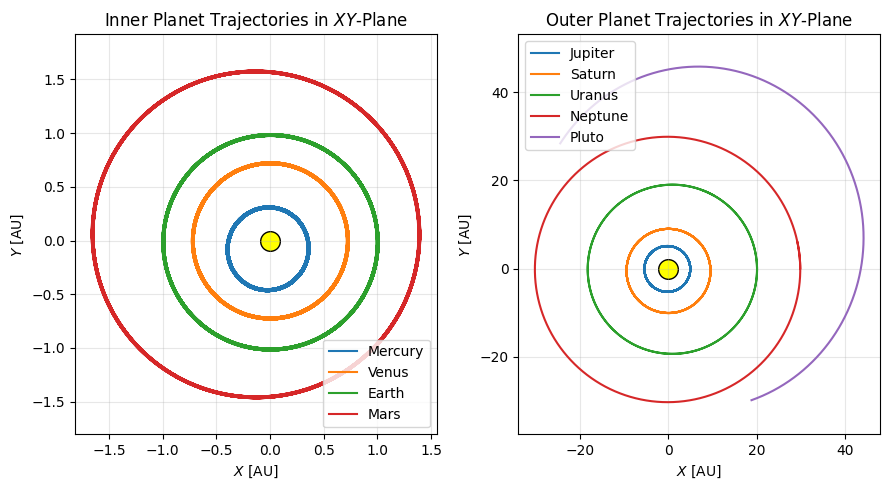

In [ ]:
# -------------------------------
# plotting: planet trajectories in XY-plane [AU]
# -------------------------------
inner_planets = [planet_names.index(planet) for planet in ['Mercury', 'Venus', 'Earth', 'Mars']]
outer_planets = [planet_names.index(planet) for planet in ['Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']]

plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
for i in inner_planets:
    plt.plot(
        [x / AU for x in trajectories_x[i]],
        [y / AU for y in trajectories_y[i]],
        label=planet_names[i],
    )
plt.scatter(0.00, 0.00, c='yellow', s=200, marker='o', edgecolors='black')  # Sun

plt.xlabel('$X$ [AU]')
plt.ylabel('$Y$ [AU]')
plt.title('Inner Planet Trajectories in $XY$-Plane')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for i in outer_planets:
    plt.plot(
        [x / AU for x in trajectories_x[i]],
        [y / AU for y in trajectories_y[i]],
        label=planet_names[i],
    )
plt.scatter(0.00, 0.00, c='yellow', s=200, marker='o', edgecolors='black')  # Sun

plt.xlabel('$X$ [AU]')
plt.ylabel('$Y$ [AU]')
plt.title('Outer Planet Trajectories in $XY$-Plane')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

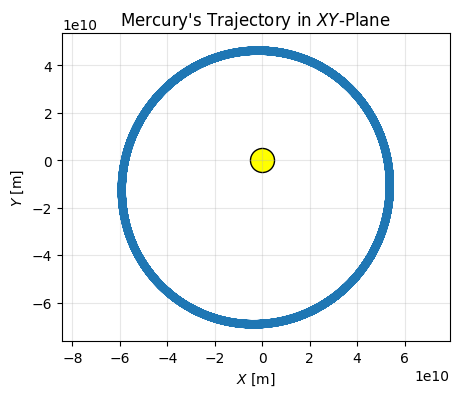

In [ ]:
# -------------------------------
# plotting: planet trajectory in XY-plane [m]
# -------------------------------
plt_index = planet_names.index('Mercury')

plt.figure(figsize=(5, 4))
plt.plot(trajectories_x[plt_index], trajectories_y[plt_index])
plt.scatter(0.00, 0.00, c='yellow', s=300, marker='o', edgecolors='black')

plt.xlabel('$X$ [m]')
plt.ylabel('$Y$ [m]')
plt.title(f"{planet_names[plt_index]}'s Trajectory in $XY$-Plane")
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

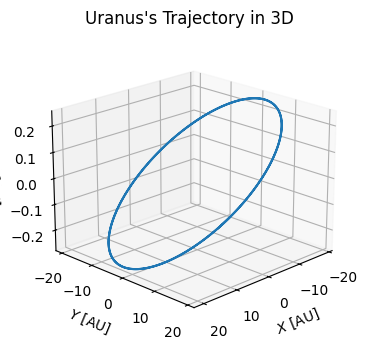

In [ ]:
# -------------------------------
# plotting: planet trajectory in 3D [AU]
# -------------------------------
plt_index = planet_names.index('Uranus')

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot(
    [x / AU for x in trajectories_x[plt_index]],
    [y / AU for y in trajectories_y[plt_index]],
    [z / AU for z in trajectories_z[plt_index]],
)

ax.set_xlabel('$X$ [AU]')
ax.set_ylabel('$Y$ [AU]')
ax.set_zlabel('$Z$ [AU]')
ax.set_title(f"{planet_names[plt_index]}'s Trajectory in 3D")

# adjust view angle for better visualization
ax.view_init(elev=20, azim=45)
plt.show()

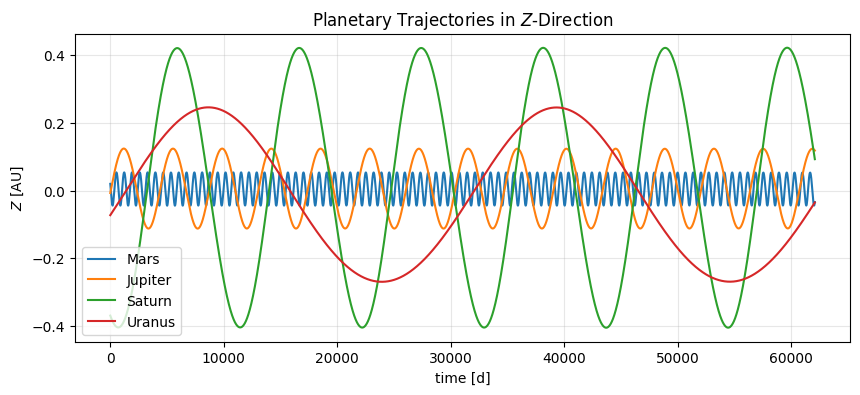

In [ ]:
# -------------------------------
# plotting: planet trajectories in Z-plane [AU]
# -------------------------------
indices = [planet_names.index(planet) for planet in ['Mars', 'Jupiter', 'Saturn', 'Uranus']]

plt.figure(figsize=(10, 4))
for i in indices:
    plt.plot(time_points, [z / AU for z in trajectories_z[i]], label=planet_names[i])

plt.xlabel('time [d]')
plt.ylabel('$Z$ [AU]')
plt.title('Planetary Trajectories in $Z$-Direction')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

> All celestial bodies have accurately shaped orbits, both horizontally and vertically, with proper distances maintained between them in the plots. The orbits appear correct, and no drifting has occurred.

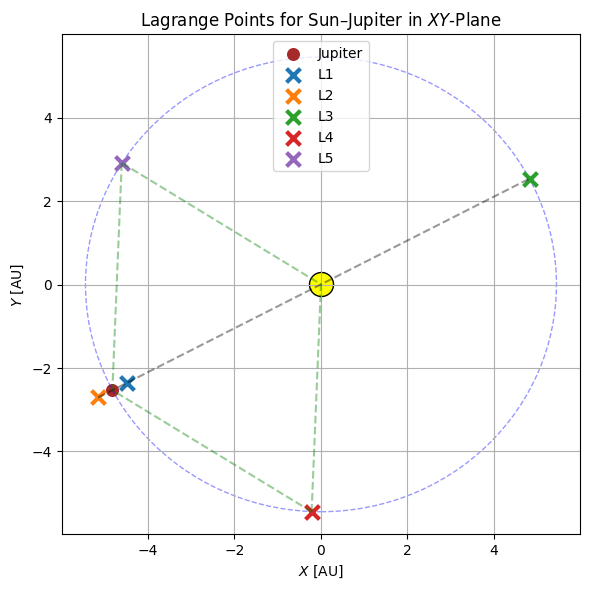

Points L1, L2, and L3 are collinear
Angle at ∠L4:      60.0°
Angle at ∠L5:      60.0°
Angle at ∠Jupiter: 120.0°

Distances check:
L4-Sun:         5.4513 [AU]
L4-Jupiter:     5.4513 [AU]
Sun-Jupiter:    5.4503 [AU]
Relative error: 0.00%
L5-Sun:         5.4513 [AU]
L5-Jupiter:     5.4513 [AU]
Relative error: 0.00%


In [ ]:
# -------------------------------
# plotting: Jupiter's Lagrangian points for latest state vector in XY-plane [AU]
# -------------------------------
import matplotlib.patches as patches

sun_idx = planet_names.index('Sun')
jupiter_idx = planet_names.index('Jupiter')

# compute Lagrange points
lagrange_points = compute_lagrange_points(state, m, sun_idx, jupiter_idx)

# Sun and Jupiter XY-coordinates
sun_x = trajectories_x[sun_idx][-1] / AU
sun_y = trajectories_y[sun_idx][-1] / AU
jupiter_x = trajectories_x[jupiter_idx][-1] / AU
jupiter_y = trajectories_y[jupiter_idx][-1] / AU

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(sun_x, sun_y, c='yellow', s=300, marker='o', edgecolors='black') # Sun
ax.scatter(jupiter_x, jupiter_y, c='brown', s=70, label='Jupiter')

# add circumcircle
distance = np.sqrt((lagrange_points['L4'][0] - sun_x)**2 + (lagrange_points['L4'][1] - sun_y)**2)
props = {
    'radius': distance / AU,
    'facecolor': 'none',
    'linestyle': '--',
    'edgecolor': 'blue',
    'alpha': 0.4
    }
circumcircle = patches.Circle((sun_x, sun_y), **props)
plt.gca().add_patch(circumcircle)

# plot Lagrangian points
for key, pos in lagrange_points.items():
  x_au = pos[0] / AU
  y_au = pos[1] / AU
  ax.scatter(x_au, y_au, marker='x', s=100, label=key, linewidths=3)
  '''
  ax.annotate(
      key,
      (x_au, y_au),
      xytext=(x_au + 0.2, y_au + 0.2),
      fontsize=15,
      color='black',
      bbox={'facecolor': 'white', 'alpha': 0.2, 'edgecolor': 'none'},
      )
  '''

# L2, L3, L4, L5 XY-coordinates [AU]
L2_x = lagrange_points['L2'][0] / AU
L2_y = lagrange_points['L2'][1] / AU

L3_x = lagrange_points['L3'][0] / AU
L3_y = lagrange_points['L3'][1] / AU

L4_x = lagrange_points['L4'][0] / AU
L4_y = lagrange_points['L4'][1] / AU

L5_x = lagrange_points['L5'][0] / AU
L5_y = lagrange_points['L5'][1] / AU

# plot lines
line_props = {'linestyle': '--', 'alpha': 0.4}
ax.plot([L2_x, L3_x], [L2_y, L3_y], **line_props, c='black') # L2–L3
ax.plot([L4_x, sun_x, L5_x], [L4_y, sun_y, L5_y], **line_props, c='g') # L4–Sun–L5
ax.plot([L4_x, jupiter_x, L5_x], [L4_y, jupiter_y, L5_y], **line_props, c='g') # L4–Jupiter–L5

ax.set_xlabel('$X$ [AU]')
ax.set_ylabel('$Y$ [AU]')
ax.set_title('Lagrange Points for Sun–Jupiter in $XY$-Plane')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

# are points collinear?
# calculate vectors L1-L2 and L2-L3
vector_L1L2 = lagrange_points['L2'] - lagrange_points['L1']
vector_L2L3 = lagrange_points['L3'] - lagrange_points['L2']

cross_product = np.cross(vector_L1L2, vector_L2L3)

# check if the cross product is approximately zero
# looser tolerance (e.g., rtol = 1e-9, atol = 1e9) for lower-precision calculations
rtol = 1e-8  # relative tolerance for astronomical scales
atol = 1e8   # absolute tolerance in [m]
is_collinear = np.allclose(cross_product, 0, rtol=rtol, atol=atol)

# output the result
if is_collinear:
    print('Points L1, L2, and L3 are collinear')
else:
    print('Points L1, L2, and L3 are not collinear')

# vectors [AU]
vector_jup_L4  = np.array([jupiter_x, jupiter_y]) - np.array([L4_x, L4_y])
vector_sun_L4  = np.array([sun_x, sun_y]) - np.array([L4_x, L4_y])
vector_jup_L5  = np.array([jupiter_x, jupiter_y]) - np.array([L5_x, L5_y])
vector_sun_L5  = np.array([sun_x, sun_y]) - np.array([L5_x, L5_y])
vector_sun_jup = np.array([sun_x, sun_y]) - np.array([jupiter_x, jupiter_y])

# calculate the angles
angle_L4  = np.degrees(angle_between_vectors(vector_jup_L4, vector_sun_L4))
angle_L5  = np.degrees(angle_between_vectors(vector_jup_L4, vector_sun_L4))
angle_jup = np.degrees(angle_between_vectors(vector_sun_jup, vector_jup_L4))

print(f'Angle at ∠L4:      {angle_L4:.1f}°')
print(f'Angle at ∠L5:      {angle_L5:.1f}°')
print(f'Angle at ∠Jupiter: {angle_jup:.1f}°')

# verify distances (should be approximately equal for equilateral triangle)
dist_L4_sun  = np.linalg.norm(vector_sun_L4)
dist_L4_jup  = np.linalg.norm(vector_jup_L4)
dist_L5_sun  = np.linalg.norm(vector_sun_L5)
dist_L5_jup  = np.linalg.norm(vector_jup_L5)
dist_sun_jup = np.linalg.norm(vector_sun_jup)

print(f'\nDistances check:')
print(f'L4-Sun:         {dist_L4_sun:.4f} [AU]')
print(f'L4-Jupiter:     {dist_L4_jup:.4f} [AU]')
print(f'Sun-Jupiter:    {dist_sun_jup:.4f} [AU]')
print(f'Relative error: {abs(dist_L4_sun - dist_L4_jup) / dist_sun_jup*100:.2f}%')

print(f'L5-Sun:         {dist_L5_sun:.4f} [AU]')
print(f'L5-Jupiter:     {dist_L5_jup:.4f} [AU]')
print(f'Relative error: {abs(dist_L5_sun - dist_L5_jup) / dist_sun_jup*100:.2f}%')

> The Langragian points are correctly computed. $L_1$, $L_2$, and $L_3$ are collinear - all lie in a straight line. $L_4$ and $L_5$ are symmetrically placed either side of the center line and at positions 60° from it at the vertices of equilateral triangles. The triangular points ($L_4$ and $L_5$) are stable equilibria.

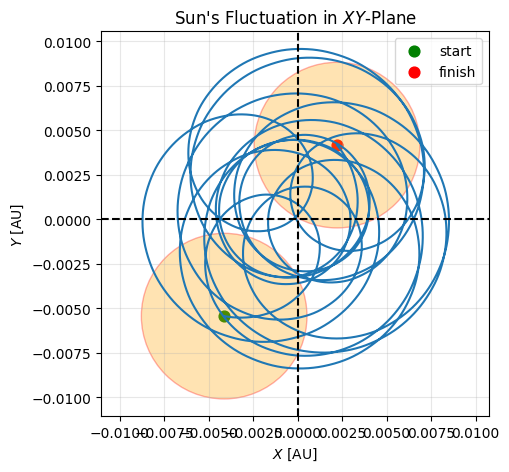

In [ ]:
# -------------------------------
# plotting: Sun's wobbling in XY-plane [AU]
# -------------------------------
R_sun_AU = 0.0046524726  # Sun radius for scale

# patch properties
props = {'radius': R_sun_AU, 'facecolor': 'orange', 'alpha': 0.3, 'edgecolor': 'red'}

plt.figure(figsize=(5, 5))
plt.plot([x / AU for x in trajectories_x[3]], [y / AU for y in trajectories_y[3]])

# start and finish markers in AU
X_start = trajectories_x[3][0] / AU
Y_start = trajectories_y[3][0] / AU
Z_start = trajectories_z[3][0] / AU
plt.scatter(X_start, Y_start, c='green', marker='o', s=60, label='start')

X_finish = trajectories_x[3][-1] / AU
Y_finish = trajectories_y[3][-1] / AU
Z_finish = trajectories_z[3][-1] / AU
plt.scatter(X_finish, Y_finish, c='red', marker='o', s=60, label='finish')

# add solar disks
start_disk = patches.Circle((X_start, Y_start), **props)
plt.gca().add_patch(start_disk)

finish_disk = patches.Circle((X_finish, Y_finish), **props)
plt.gca().add_patch(finish_disk)

#plt.scatter(0.00, 0.00, c='blue', marker='x', s=70, label='barycenter')
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axvline(x=0.0, color='black', linestyle='--')
plt.xlabel('$X$ [AU]')
plt.ylabel('$Y$ [AU]')
plt.title("Sun's Fluctuation in $XY$-Plane")
plt.axis('equal')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

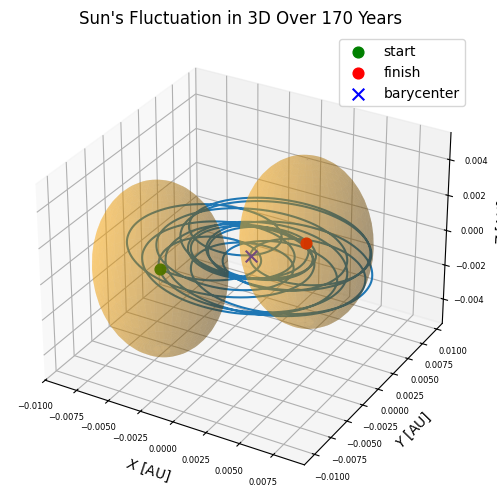

In [ ]:
# -------------------------------
# plotting: Sun's wobbling in 3D [AU]
# -------------------------------
#from mpl_toolkits.mplot3d import Axes3D

years = round((time_points[-1] - time_points[0]) / 365.256)

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(
    [x / AU for x in trajectories_x[3]],
    [y / AU for y in trajectories_y[3]],
    [z / AU for z in trajectories_z[3]],
)

# helper to plot a sphere at (x0, y0, z0)
def plot_sphere(ax, x0, y0, z0, radius, color, alpha=0.6):
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
    xs = radius * np.cos(u) * np.sin(v) + x0
    ys = radius * np.sin(u) * np.sin(v) + y0
    zs = radius * np.cos(v) + z0
    ax.plot_surface(xs, ys, zs, color=color, alpha=alpha, linewidth=0)

# draw spheres
plot_sphere(ax, X_start, Y_start, Z_start, R_sun_AU, color='orange', alpha=0.3)
plot_sphere(ax, X_finish, Y_finish, Z_finish, R_sun_AU, color='orange', alpha=0.3)

# plot markers (centers)
ax.scatter(X_start, Y_start, Z_start, color='green', s=60, label='start')
ax.scatter(X_finish, Y_finish, Z_finish, color='red', s=60, label='finish')
ax.scatter(0.00, 0.00, 0.00, c='blue', marker='x', s=70, label='barycenter')

ax.set_xlabel('$X$ [AU]')
ax.set_ylabel('$Y$ [AU]')
ax.set_zlabel('$Z$ [AU]')
ax.set_title(f"Sun's Fluctuation in 3D Over {years} Years")
ax.tick_params(axis='both', labelsize=6)
ax.legend()
plt.show()

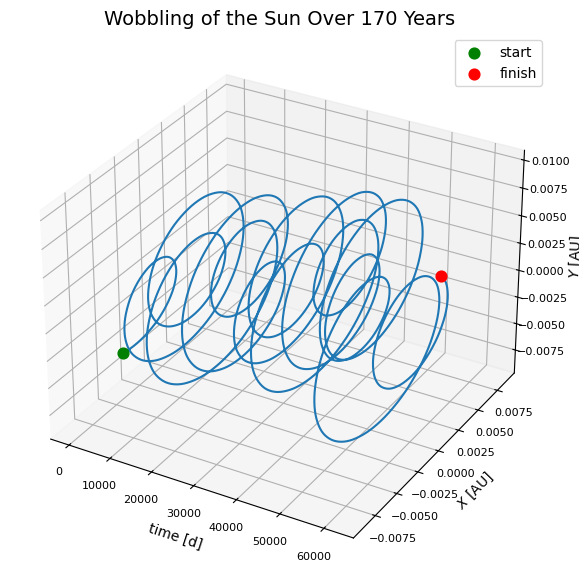

In [ ]:
# -------------------------------
# plotting: Sun's wobbling realtive to the timescale
# -------------------------------
years = round((time_points[-1] - time_points[0]) / 365.256)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(time_points, [x / AU for x in trajectories_x[3]], [y / AU for y in trajectories_y[3]])
ax.scatter(time_points[0], X_start, Y_start, c='green', marker='o', s=60, label='start')
ax.scatter(time_points[-1], X_finish, Y_finish, c='red', marker='o', s=60, label='finish')

ax.set_xlabel('time [d]')
ax.set_ylabel('$X$ [AU]')
ax.set_zlabel('$Y$ [AU]')
ax.set_title(f'Wobbling of the Sun Over {years} Years', fontsize=14)
ax.tick_params(axis='both', labelsize=8)
plt.legend()
plt.show()

> These charts prove that the Sun is not the center of our Solar System, is not stationary, and traces a circular and complex trajectory (rosette) around the barycenter. The star's fluctuation is due to the gravitational attraction of all planets. Planets exert a "wobbling" effect and cause it to orbit a point outside its radius. Since the Sun is far more massive than the planets, the pull felt by the Sun are rather small, yet still measureable. This "wobble" is the principle behind the wobble method used to detect exoplanets (planets orbiting other stars). Astronomers can detect the faint wobble of a distant star, indicating it has orbiting planets.

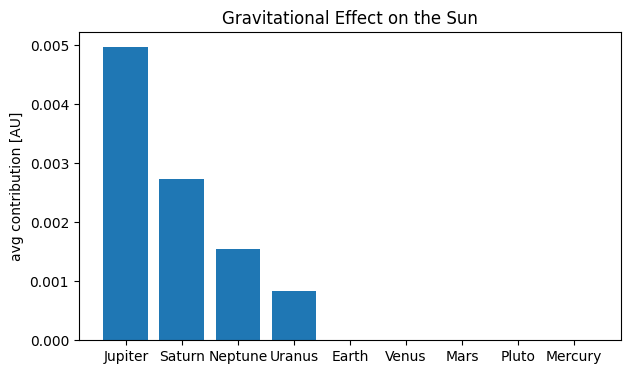

In [ ]:
# -------------------------------
# plotting: gravitational effect on the Sun [AU]
# -------------------------------
avg_contribs = {name: np.mean(values) / AU for name, values in contribs.items()}
sorted_names = sorted(avg_contribs, key=avg_contribs.get, reverse=True)
sorted_values = [avg_contribs[name] for name in sorted_names]

plt.figure(figsize=(7, 4))
plt.bar(sorted_names, sorted_values)
plt.ylabel('avg contribution [AU]')
plt.title('Gravitational Effect on the Sun')
plt.show()

> This chart ranks the planets by their influence on the Sun's drift. These contributions represent the relative "pull" in terms of displacement amplitude in AU. Jupiter obviously has the largest effect, followed by the other gas giants. The inner planets (and Pluto) have negligible impact due to their low masses. This bar plot conducts that the planet's contribution decreases with its mass.

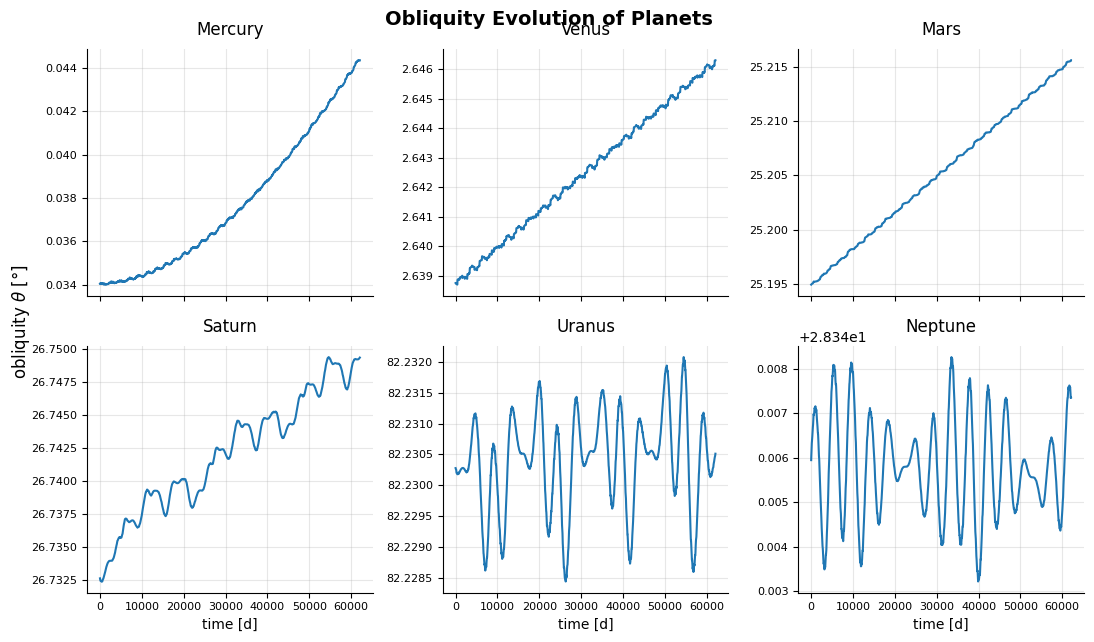

In [ ]:
# -------------------------------
# plotting: axial tilts
# -------------------------------
# excepted values:
# Mercury: ~0.03°, Venus: ~2.64°, Mars: ~25.19°
# Saturn: ~26.73°, Uranus: ~82.23°, Neptune: ~28.32°
positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

fig, axs = plt.subplots(2, 3, figsize=(11, 6.5), sharex=True)

for planet, (row, col) in zip(selected_planets, positions):
    ax = axs[row, col]
    ax.plot(time_points, axial_tilt_history[planet])
    ax.set_title(planet, fontsize=12, pad=10)
    ax.grid(True, alpha=0.3)

    # add x-label only to bottom row
    if row == 1:
        ax.set_xlabel('time [d]', fontsize=10)

    # customize axes
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# common y-label
fig.text(0.01, 0.5, 'obliquity $\\theta$ [°]', va='center', rotation='vertical', fontsize=12)
plt.suptitle('Obliquity Evolution of Planets', fontsize=14, weight='bold')
plt.tight_layout()
fig.subplots_adjust(top=0.92, left=0.08)
plt.show()

> The obliquities are referenced to the ecliptic of J2000.0 frame and modeled only due to mutual gravitational pull of the major celestial bodies of the Solar System. Axial tilts change over time not only due to gravity. The obliquity change is much more complex and caused by other factors, such as: geological forces (for terrestial bodies), moon interactions, rotation period, or interactions with primordial circumplanetary disks (outer planets). The inner planets (top row) tend to have much more steady and linear tilt evolutions. This is likely caused by higher gravitational influence of other bodies (especially the Sun) and their higher densities. Gas giants (bottom row) have much more chaotic obliquity changes. They are less dense than terrestial bodies but far more massive. Their large mass and strong gravity allow them to attract and be influenced by more celestial bodies compared to inner planets.

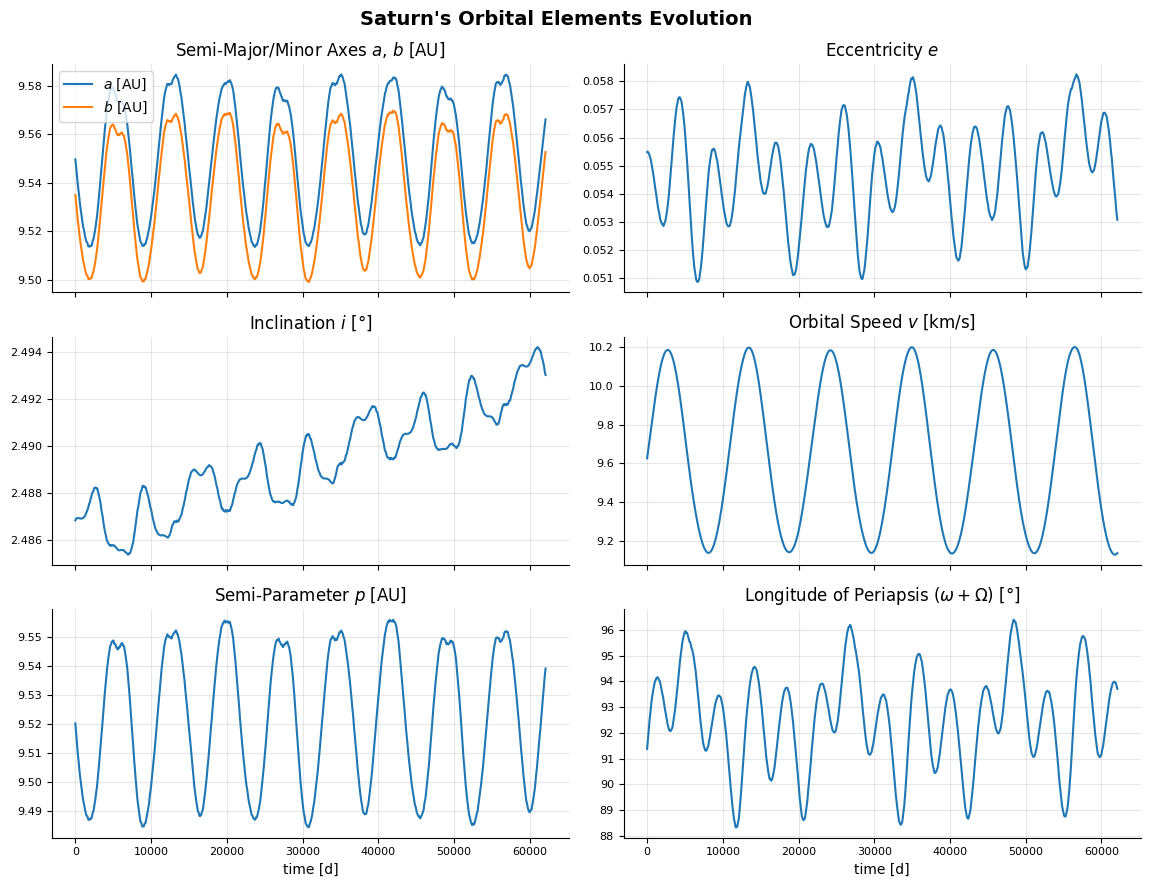

In [ ]:
# -------------------------------
# plotting: Saturn's orbital elements
# -------------------------------
# expected values: a ~9.53 [AU], b ~9.51 [AU]
# e ~0.0565, i ~2.485°, v ~9.6 [km/s]
# p ~9.52 [AU], ϖ ~92.86°

# define plot configurations: title, data, labels, and conversion factors
plot_configs = [
    {
        'title': 'Semi-Major/Minor Axes $a$, $b$ [AU]',
        'data': [[a / AU for a in semi_majors], [b / AU for b in semi_minors]],
        'labels': ['$a$ [AU]', '$b$ [AU]'],
        'xlabel': 'time [d]',
        'position': (0, 0),
        },
    {
        'title': 'Eccentricity $e$',
        'data': [eccentricities],
        'labels': ['$e$'],
        'xlabel': 'time [d]',
        'position': (0, 1),
        },
    {
        'title': 'Inclination $i$ [°]',
        'data': [inclinations],
        'labels': ['$i$ [°]'],
        'xlabel': 'time [d]',
        'position': (1, 0),
        },
    {
        'title': 'Orbital Speed $v$ [km/s]',
        'data': [[v / 1e3 for v in orbital_speeds]],  # [m/s] --> [km/s]
        'labels': ['$v$ [km/s]'],
        'xlabel': 'time [d]',
        'position': (1, 1),
        },
    {
        'title': 'Semi-Parameter $p$ [AU]',
        'data': [[p / AU for p in semi_parameters]],
        'labels': ['$p$ [AU]'],
        'xlabel': 'time [d]',
        'position': (2, 0),
        },
    {
        'title': 'Longitude of Periapsis $(\\omega + \\Omega)$ [°]',
        'data': [long_periapses],
        'labels': ['$(\\omega + \\Omega)$ [°]'],
        'xlabel': 'time [d]',
        'position': (2, 1),
        },
]

fig, axs = plt.subplots(3, 2, figsize=(12, 9), sharex=True)

# loop through plot configurations
for config in plot_configs:
    row, col = config['position']
    ax = axs[row, col]

    # plot each orbital characteristic
    for i, data in enumerate(config['data']):
        ax.plot(time_points, data, label=config['labels'][i])

    # customize plot
    ax.set_title(config['title'])
    ax.grid(True, alpha=0.3)

    # x-label only to bottom row
    if row == 2:
        ax.set_xlabel(config['xlabel'], fontsize=10)

    # add legend if multiple datasets
    if len(config['data']) > 1:
        ax.legend()

    # customize axes
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.suptitle("Saturn's Orbital Elements Evolution", fontsize=14, weight='bold')
plt.tight_layout()
fig.subplots_adjust(top=0.92, left=0.08)
plt.show()

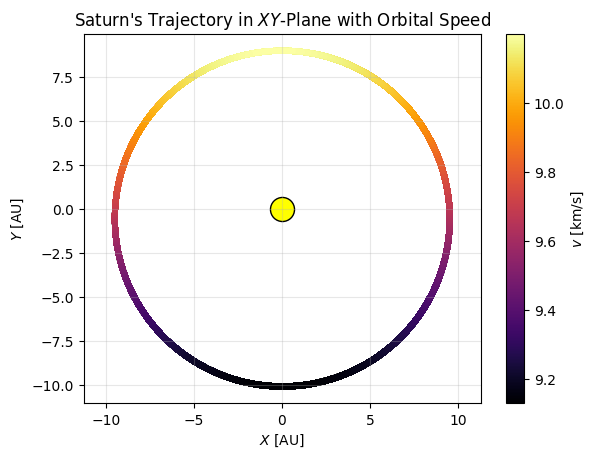

In [ ]:
# -------------------------------
# plotting: Saturn's orbital speed
# -------------------------------
plt_index = planet_names.index('Saturn')

sc = plt.scatter(
    [x / AU for x in trajectories_x[plt_index]],
    [y / AU for y in trajectories_y[plt_index]],
    c=[v / 1e3 for v in orbital_speeds],
    cmap='inferno',
    s=10,
    )
plt.scatter(0.00, 0.00, c='yellow', s=300, marker='o', edgecolors='black') # Sun

plt.xlabel('$X$ [AU]')
plt.ylabel('$Y$ [AU]')
plt.title(f"{planet_names[plt_index]}'s Trajectory in $XY$-Plane with Orbital Speed")
plt.axis('equal')
plt.colorbar(sc, label='$v$ [km/s]')
plt.grid(True, alpha=0.3)
plt.show()

> This plot displays how Saturn's instantaneous speed changes along its orbit, which lies nearly in the ecliptic plane. The orbital speed clearly increases when approaching the perihelion (closest approach to the Sun) and decreasing closer to the aphelion (farthest point). According to the vis-viva equation, the key factor for speed is $r$, the radial distance from the central body. The semi-major axis $a$ defines the orbit's size and shape, but it remains constant for a given orbit (Kepler's second law), whereas $r$ varies for elliptical orbits, making it the primary driver of speed changes at different points.

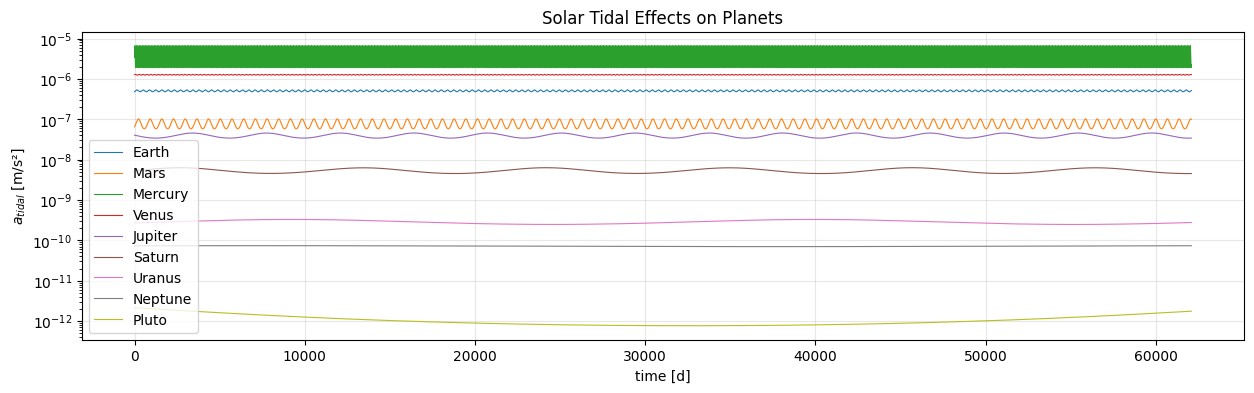

In [ ]:
# -------------------------------
# plotting: solar tidal accelerations [kg·m²/s]
# -------------------------------
plt.figure(figsize=(15, 4))

for planet, values in tidal_effects.items():
    plt.plot(time_points, values, label=planet, lw=0.8)
plt.xlabel('time [d]')
plt.ylabel('$a_{tidal}$ [m/s²]')
plt.title('Solar Tidal Effects on Planets')
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.legend()
plt.show()

> Solar tidal accelerations on planets vary cyclically with orbital motion, reflecting the changing Sun-body distance along their orbits. The strongest solar tides are found on the inner planets, because tidal force scales as $R/r^3$, and their smaller orbital radii dominate over size. This explains why solar tides are most important for terrestrial planets, while becoming negligible in the outer Solar System. The outer bodies appear to have much "flatter" curves.

In [ ]:
# helper to summarize avg (mean) & max solar tidal accelerations per planet
def summarize_solar_tides(tidal_history):
    summary = []
    for planet, values in tidal_history.items():
        arr = np.array(values)
        mean_val = np.mean(arr)
        max_val = np.max(arr)
        summary.append((planet, mean_val, max_val))

    # sort by mean (avg) tidal strength (descending)
    summary.sort(key=lambda x: x[1], reverse=True)
    return summary

summary = summarize_solar_tides(tidal_effects)

table = PrettyTable()
table.field_names = ['Celestial Body', 'Avg Tidal Acceleration [m/s²]', 'Max Tidal Acceleration [m/s²]']

for planet, mean_val, max_val in summary:
    table.add_row([planet, f'{mean_val:.3e}', f'{max_val:.3e}'])

print(table)

+----------------+-------------------------------+-------------------------------+
| Celestial Body | Avg Tidal Acceleration [m/s²] | Max Tidal Acceleration [m/s²] |
+----------------+-------------------------------+-------------------------------+
|    Mercury     |           3.558e-06           |           6.653e-06           |
|     Venus      |           1.268e-06           |           1.294e-06           |
|     Earth      |           5.067e-07           |           5.340e-07           |
|      Mars      |           7.703e-08           |           1.021e-07           |
|    Jupiter     |           3.939e-08           |           4.575e-08           |
|     Saturn     |           5.363e-09           |           6.313e-09           |
|     Uranus     |           2.854e-10           |           3.290e-10           |
|    Neptune     |           7.181e-11           |           7.373e-11           |
|     Pluto      |           1.087e-12           |           2.138e-12           |
+---

> This data confirms that the Sun is the primary source of tidal forces in the Solar System, with inner planets experiencing significantly stronger tidal effects due to their proximity (especially Mercury and Mars). Both Mercury and Mars show significant differences between average and maximum tidal accelerations. For instance, Mercury experiences highly variable tidal forces, likely due to its eccentric orbit. The maximum values align well with perihelion calculations, suggesting the simulation captures orbital eccentricity effects.

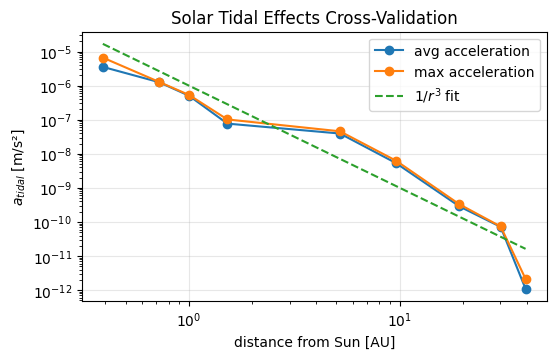

In [ ]:
# -------------------------------
# plotting: solar tidal accelerations check
# -------------------------------
au_distances = [0.39, 0.72, 1.00, 1.52, 5.20, 9.58, 19.18, 30.07, 39.48]
avg_tidal = [summary[i][1] for i in range(len(m) - 1)]
max_tidal = [summary[i][2] for i in range(len(m) - 1)]

plt.figure(figsize=(6, 3.5))

plt.loglog(au_distances, avg_tidal, 'o-', label='avg acceleration')
plt.loglog(au_distances, max_tidal, 'o-', label='max acceleration')
plt.loglog(au_distances, 1e-6 / np.array(au_distances)**3, '--', label='$1/r^3$ fit')
plt.xlabel('distance from Sun [AU]')
plt.ylabel('$a_{tidal}$ [m/s²]')
plt.title('Solar Tidal Effects Cross-Validation')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

> This plot shows tidal accelerations against the average distance from the Sun to confirm the $1/r^3$ relationship. The computed tidal effects follow closely the theoretical curve. The highest tidal accelerations are on the closest celestial bodies, and they get smaller as they approach the outer Solar System. This cross-validation ensures the simulation's accuracy. Small discrepancies are present possibly due to: contributions from other bodies reducing the net tidal effect or averaging over time, including aphelion (where tidal acceleration is lower).

In [ ]:
# -------------------------------
# momentum & barycenter (SSB) diagnostics summary
# -------------------------------
# total mass of the system [kg]
M_total = np.sum(m)

p_mag = np.array([np.linalg.norm(p) for p in momenta])  # momentum magnitude [kg·m/s]
rel_p_scaled = np.array(rel_momentum_errors_scale)      # |p| / p_scale
cm_pos = np.array(cm_positions)                         # SSB position drift [m]
cm_speed = np.array(cm_speeds)                          # SSB velocity [m/s]

# helper to assign quality tier based on value and bounds
def tier(value, bounds, labels):
    # bounds ascending; returns corresponding label
    for b, lab in zip(bounds, labels):
        if value <= b:
            return lab
    return labels[-1]

# simulation length - years & seconds
sim_years = round((time_points[-1] - time_points[0]) / 365.256)
sim_seconds = t_end

# suggested thresholds
drift_bounds = [1e-6 * AU, 1e-5 * AU, 1e-4 * AU]        # SSB drift thresholds [m]
speed_bounds = [d / sim_seconds for d in drift_bounds]  # SSB speed thresholds [m/s]
relp_bounds  = [1e-9, 1e-7, 1e-6]                       # Relative momentum error thresholds
labels = ['Excellent', 'Good', 'Caution', 'Poor']

# summary statistics
max_cm_drift = float(np.max(cm_pos))                   # max SSB position drift [m]
rms_cm_drift = float(np.sqrt(np.mean(cm_pos**2)))      # RMS SSB position drift [m]
max_cm_speed = float(np.max(cm_speed))                 # max SSB velocity [m/s]
rms_cm_speed = float(np.sqrt(np.mean(cm_speed**2)))    # RMS SSB velocity [m/s]
max_rel_p = float(np.max(rel_p_scaled))                # max relative momentum error
rms_rel_p = float(np.sqrt(np.mean(rel_p_scaled**2)))   # RMS relative momentum error

print('Momentum & SSB Conservation Summary:')
print(f'Simulation length: {sim_years} [yr]')
print(f'Max SSB drift: {max_cm_drift:.3e} [m]   --> {tier(max_cm_drift, drift_bounds, labels)}')
print(f'RMS SSB drift: {rms_cm_drift:.3e} [m]')
print(f'Max SSB speed: {max_cm_speed:.3e} [m/s] --> {tier(max_cm_speed, speed_bounds, labels)}')
print(f'RMS SSB speed: {rms_cm_speed:.3e} [m/s]')
print(f'Max |p|/∑ m|v|: {max_rel_p:.3e} --> {tier(max_rel_p, relp_bounds, labels)}')
print(f'RMS |p|/∑ m|v|: {rms_rel_p:.3e}')

print('\nThresholds:')
for d, s in zip(drift_bounds, speed_bounds):
    print(f' Drift: {d:.3e} [m] --> Speed: {s:.3e} [m/s]')

Momentum & SSB Conservation Summary:
Simulation length: 170 [yr]
Max SSB drift: 5.377e-03 [m]   --> Excellent
RMS SSB drift: 2.638e-03 [m]
Max SSB speed: 3.913e-12 [m/s] --> Excellent
RMS SSB speed: 1.757e-12 [m/s]
Max |p|/∑ m|v|: 1.347e-13 --> Excellent
RMS |p|/∑ m|v|: 6.051e-14

Thresholds:
 Drift: 1.496e+05 [m] --> Speed: 2.788e-05 [m/s]
 Drift: 1.496e+06 [m] --> Speed: 2.788e-04 [m/s]
 Drift: 1.496e+07 [m] --> Speed: 2.788e-03 [m/s]


> The momentum and SSB diagnostics summary displays perfect results, according to the tiered evaluation system. The barycenter had bare drift across the simulation. We computed both maximum and RMS statistics for a comprehensive assessment. The thresholds are appropriate for the model's duration and precision requirements. The accuracy of the sympletic integrator is correct and no numerical issues occurred. The diagnostics preserve the relationship between position and speed drifts ($v_{SSB} ≈ \frac{r_{SSB}}{t}$).

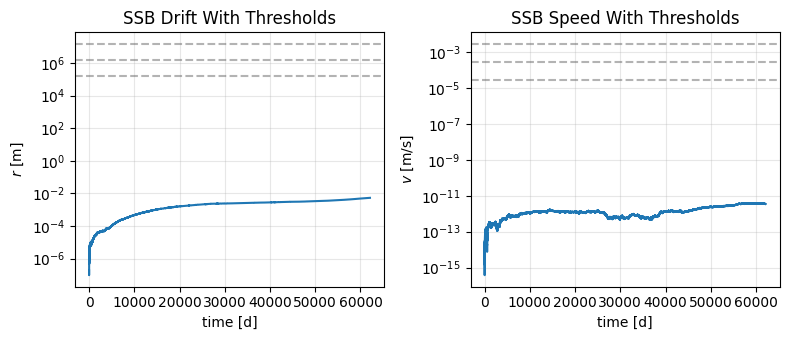

In [ ]:
# -------------------------------
# plotting: barycenter drift & speed over time
# -------------------------------
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

ax[0].plot(time_points, cm_pos)
for bound in drift_bounds:
    ax[0].axhline(bound, color='dimgray', linestyle='--', alpha=0.5)
ax[0].set_xlabel('time [d]')
ax[0].set_ylabel('$r$ [m]')
ax[0].set_yscale('log')
ax[0].set_title('SSB Drift With Thresholds')
ax[0].grid(alpha=0.3)

ax[1].plot(time_points, cm_speed)
for bound in speed_bounds:
    ax[1].axhline(bound, color='dimgray', linestyle='--', alpha=0.5)
ax[1].set_xlabel('time [d]')
ax[1].set_ylabel('$v$ [m/s]')
ax[1].set_yscale('log')
ax[1].set_title('SSB Speed With Thresholds')
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

> These visualizations demonstrate the SSB dynamics are far from the thresholds.

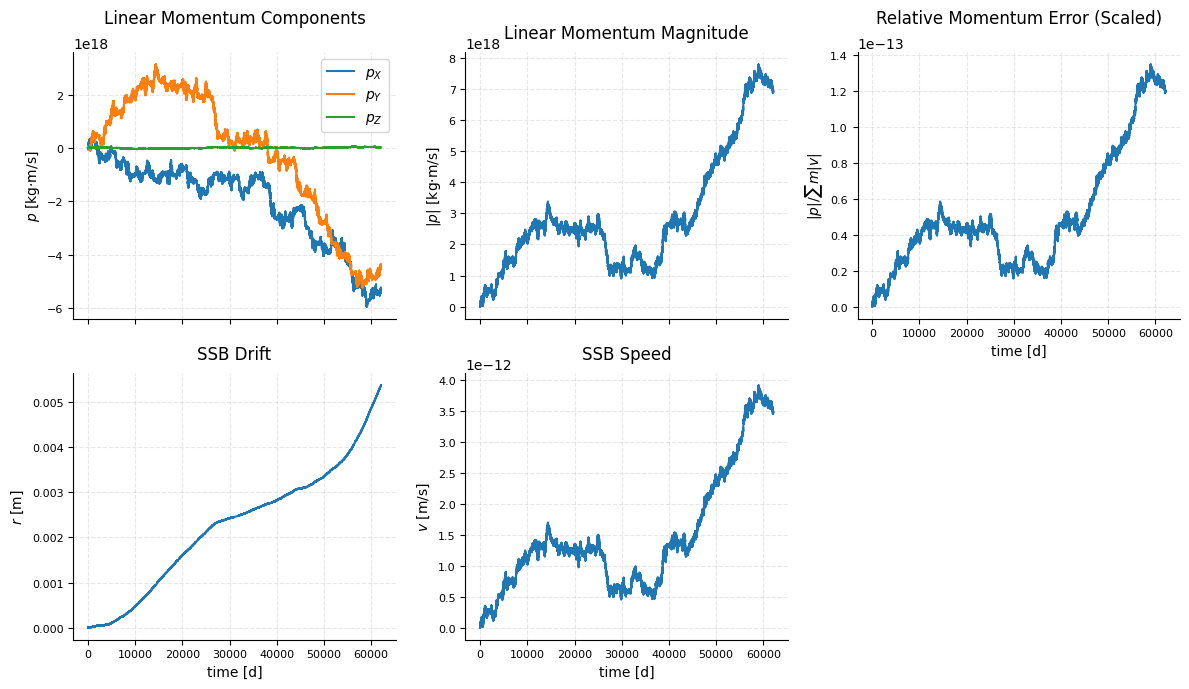

In [ ]:
# -------------------------------
# plotting: barycenter momentum components & magnitudes
# -------------------------------
# create figure and 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(12, 7), sharex=True)

# define plot configurations
plot_configs = [
    {
        'title': 'Linear Momentum Components',
        'data': [[p[0] for p in momenta], [p[1] for p in momenta], [p[2] for p in momenta]],
        'labels': ['$p_X$', '$p_Y$', '$p_Z$'],
        'ylabel': '$p$ [kg·m/s]',
        'position': (0, 0),
        'legend': True,
    },
    {
        'title': 'Linear Momentum Magnitude',
        'data': [[np.linalg.norm(p) for p in momenta]],
        'labels': ['$|p|$'],
        'ylabel': '$|p|$ [kg·m/s]',
        'position': (0, 1),
        'legend': False,
    },
    {
        'title': 'Relative Momentum Error (Scaled)',
        'data': [rel_momentum_errors_scale],
        'labels': ['$|p| / \sum m|v|$ (t=0)'],
        'ylabel': '$|p| / \sum m|v|$',
        #'subtitle': '(Well-Defined if $p_0 \\approx 0$)',
        'position': (0, 2),
        'legend': False,
    },
    {
        'title': 'SSB Drift',
        'data': [cm_pos],
        'labels': ['$r$'],
        'ylabel': '$r$ [m]',
        'position': (1, 0),
        'legend': False,
    },
    {
        'title': 'SSB Speed',
        'data': [cm_speeds],
        'labels': ['$v_{SSB} = |p|/M$'],
        'ylabel': '$v$ [m/s]',
        'position': (1, 1),
        'legend': False,
    },
]

# loop through plot configurations
for config in plot_configs:
    row, col = config['position']
    ax = axs[row, col]

    # plot each dataset
    for i, data in enumerate(config['data']):
        ax.plot(time_points, data, linewidth=1.5, label=config['labels'][i])

    # customize plot
    ax.set_title(config['title'], fontsize=12, pad=10)
    if 'subtitle' in config:
        ax.set_title(config['title'] + '\n' + config['subtitle'], fontsize=12, pad=10, loc='center')
    ax.set_ylabel(config['ylabel'], fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='--')

    # x-label to bottom row
    if row == 1:
        ax.set_xlabel('time [d]', fontsize=10)
    # x-label and tick values for (0, 2) plot
    if row == 0 and col == 2:
        ax.set_xlabel('time [d]', fontsize=10)
        ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)

    # legend if specified
    if config.get('legend', False):
        ax.legend()

    # customize axes
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# hide unused subplot (bottom-right, [1, 2])
axs[1, 2].axis('off')

#plt.suptitle('Momentum and Barycenter Diagnostics', fontsize=14, weight='bold')
#fig.subplots_adjust(top=0.90, left=0.08)
plt.tight_layout()
plt.show()

> The momentum components do not display conservation. In an ideal N-body simulation of an isolated system like the solar system (assuming no external forces), the total linear momentum should be strictly conserved due to Newton's laws. While the vertical component $p_Z$ is almost constant, the horizontal $p_X$ and $p_Y$ show SSB decomposition, especially negative. This suggests a systematic drift or violation of momentum conservation, which shouldn't happen physically. The Solar System is chaotic and possibly the leapfrog integrator accumulates errors over time. If errors are biasing the in-plane components (where most gravitational interactions occur), $p_X$ and $p_Y$ could drift downward, potentially converging if the errors symmetrize them somehow (e.g., due to orbital symmetries or averaging effects). The relative momentum errors should ideally be zero or very small, with minimal variation, which occurs in this case. The charts for: magnitude, error, and speed follow similar shapes. The similarity in shapes is correct based on the mathematical relationships $v_{SSB} = |p| / M_{total}$ and $|p| / p_{scale}$ for error.

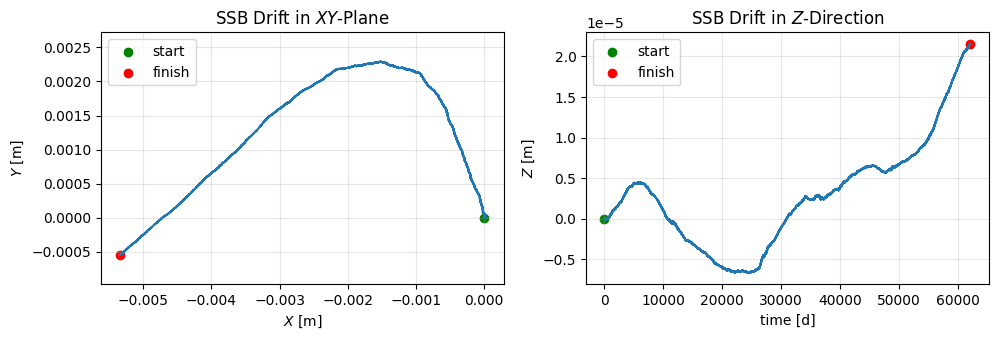

Horizontal XY-drift: 0.005377 [m]
Vertical Z-drift:    0.000022 [m]
Relative momentum error (final): |p|/p_scale = 1.197892e-13


In [ ]:
# -------------------------------
# plotting: barycenter movement - horizontally & height
# -------------------------------
plt.figure(figsize=(10, 3.5))

# XY-plane [m]
plt.subplot(1, 2, 1)
plt.plot(ssb_positions[0], ssb_positions[1])
#sc = plt.scatter(ssb_positions[0], ssb_positions[1], c=time_points, cmap=cm.viridis, s=10)
plt.scatter(ssb_positions[0][0], ssb_positions[1][0], color='green', marker='o', label='start')
plt.scatter(ssb_positions[0][-1], ssb_positions[1][-1], color='red', marker='o', label='finish')
#plt.colorbar(sc, label='time [days]')
plt.axis('equal')
plt.xlabel('$X$ [m]')
plt.ylabel('$Y$ [m]')
plt.title('SSB Drift in $XY$-Plane')
plt.legend()
plt.grid(True, alpha=0.3)

# Z vs time
plt.subplot(1, 2, 2)
plt.plot(time_points, ssb_positions[2])
plt.scatter(time_points[0], ssb_positions[2][0], color='green', marker='o', label='start')
plt.scatter(time_points[-1], ssb_positions[2][-1], color='red', marker='o', label='finish')
plt.xlabel('time [d]')
plt.ylabel('$Z$ [m]')
plt.title('SSB Drift in $Z$-Direction')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# compute drifts
# Euclidean distance
xy_dist = np.sqrt(
    (ssb_positions[0][-1] - ssb_positions[0][0])**2 +
    (ssb_positions[1][-1] - ssb_positions[1][0])**2
)
z_dist = abs(ssb_positions[2][-1] - ssb_positions[2][0])   # absolute displacement
print(f'Horizontal XY-drift: {xy_dist:.6f} [m]')
print(f'Vertical Z-drift:    {z_dist:.6f} [m]')

# check momentum conservation to diagnose numerical drift (should be < 10^-8)
p_final = np.array(momenta[-1]) / p_scale
print(f'Relative momentum error (final): |p|/p_scale = {np.linalg.norm(p_final):.6e}')

> The Solar System's barycenter movement is very negligible for such astronomic-scaled model. For 170 years, the horizontal drift was 5 mm in a negative direction, just like in-plane momentum components $p_X$ and $p_Y$. The vertical drift barely existed (almost constant $p_Z$ component). The barycenter drifts because it is the constantly moving center-of-mass for the Sun and all orbiting celestial bodies, and as particles move in their orbits, their gravitational tugs change the barycenter's location. The combined gravity of the massive planets, particularly Jupiter and Saturn, shifts the barycenter, causing the Sun to appear to wobble around this moving point. We can notice these changes (trajectories) are non-linear. Besides possible numerical errors, they are influenced by the changing distances and positions of all planets.

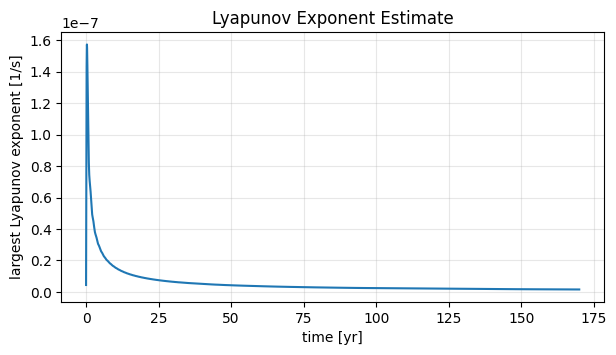

Final λ ≈ 1.5570601250253757e-09 [1/s]
Lyapunov time ≈ 20.35 [yr]


In [ ]:
# -------------------------------
# plotting: Lyapunov exponent estimate
# -------------------------------
plt.figure(figsize=(7, 3.5))
plt.plot(lyap_times, lyap_values)
plt.xlabel('time [yr]')
plt.ylabel('largest Lyapunov exponent [1/s]')
plt.title('Lyapunov Exponent Estimate')
plt.grid(True, alpha=0.3)
plt.show()

lyap_year = 1.0/lyap_values[-1]/(3600*24*365.256)

if lyap_values:
    print('Final λ ≈', lyap_values[-1], '[1/s]')
    print(f'Lyapunov time ≈ {lyap_year:.2f} [yr]')

> The log-distance plot illustrates orbital stability. The curve flattens as it approaches an asymptote near zero, indicating that the estimate is converging. As time progresses, $\lambda (t)$ stabilizes, although it may fluctuate around zero due to numerical noise. The Lyapunov time represents the limit of the system's predictability. Overall, the Lyapunov exponents demonstrate the numerical stability of the dynamic system.

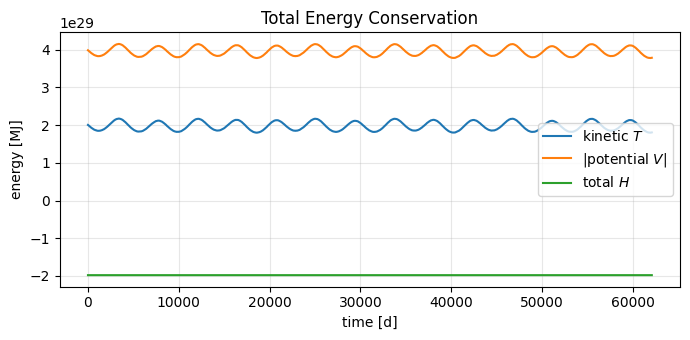

In [ ]:
# -------------------------------
# plotting: total energy conservation
# -------------------------------
# H = T + V
total_energies = [T + V for T, V in zip(kinetic_energies, potential_energies)]

plt.figure(figsize=(7, 3.5))
plt.plot(time_points, kinetic_energies, label='kinetic $T$')
plt.plot(time_points, [abs(v) for v in potential_energies], label='|potential $V$|')
plt.plot(time_points, total_energies, label='total $H$')

plt.xlabel('time [d]')
plt.ylabel('energy [MJ]')
plt.title('Total Energy Conservation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

> The total mechanical energy (kinetic + potential) remains constant with excellent energy conservation. It remains flat and constant because these two forms of energy convert into each other without a net loss or gain. Both energy curves are parallel and display energy exchange. Significant drift in total energy would indicate numerical issues. The integrator with adaptive time stepping is preserving the total energy well over the time period, suggesting the numerical integration is reliable and the system is stable.

Avg virial ratio (T/|V|):        0.50 (should be ~0.5)
Avg virial ratio (2T/|V|):       1.00 (should be ~1)
Avg virial ratio ((2T + V)/|V|): -0.00 (should be ~0)


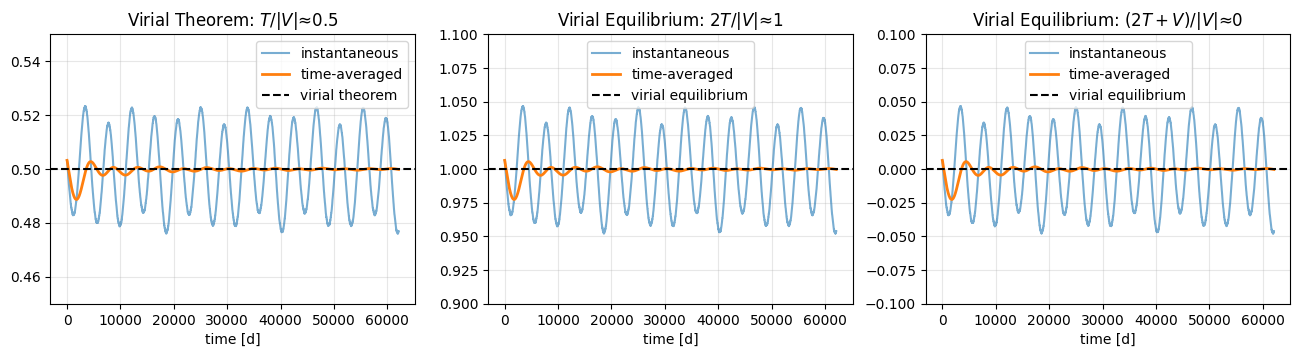

In [ ]:
# -------------------------------
# plotting: virial ratio checks
# -------------------------------
half_ratios = [T / abs(V) for T, V in zip(kinetic_energies, potential_energies)]
one_ratios  = [2*T / abs(V) for T, V in zip(kinetic_energies, potential_energies)]
zero_ratios = [(2*T + V)/ abs(V) for T, V in zip(kinetic_energies, potential_energies)]

# average virial ratios
avg_half_ratio = np.mean(avg_virial_ratios[0])
avg_one_ratio  = np.mean(avg_virial_ratios[1])
avg_zero_ratio = np.mean(avg_virial_ratios[2])

print(f'Avg virial ratio (T/|V|):        {avg_half_ratio:.2f} (should be ~0.5)')
print(f'Avg virial ratio (2T/|V|):       {avg_one_ratio:.2f} (should be ~1)')
print(f'Avg virial ratio ((2T + V)/|V|): {avg_zero_ratio:.2f} (should be ~0)')

plt.figure(figsize=(16, 3.5))

plt.subplot(1, 3, 1)
plt.plot(time_points, half_ratios, label='instantaneous', alpha=0.6)
plt.plot(time_points, avg_virial_ratios[0], label='time-averaged', linewidth=2)
plt.axhline(y=0.5, color='black', linestyle='--', label='virial theorem')

plt.xlabel('time [d]')
#plt.ylabel('virial ratio $(T/|V|)$')
plt.title(f'Virial Theorem: $T/|V| ≈ 0.5$')
plt.ylim([0.45, 0.55])
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(time_points, one_ratios, label='instantaneous', alpha=0.6)
plt.plot(time_points, avg_virial_ratios[1], label='time-averaged', linewidth=2)
plt.axhline(y=1.0, color='black', linestyle='--', label='virial equilibrium')

plt.xlabel('time [d]')
#plt.ylabel('virial ratio $(2T/|V|)$')
plt.title(f'Virial Equilibrium: $2T/|V| ≈ 1$')
plt.ylim([0.90, 1.10])
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(time_points, zero_ratios, label='instantaneous', alpha=0.6)
plt.plot(time_points, avg_virial_ratios[2], label='time-averaged', linewidth=2)
plt.axhline(y=0.0, color='black', linestyle='--', label='virial equilibrium')

plt.xlabel('time [d]')
#plt.ylabel('virial ratio $(2T/|V|)$')
plt.title(f'Virial Equilibrium: $(2T + V)/|V| ≈ 0$')
plt.ylim([-0.10, 0.10])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

> The diagnostic results indicate the simulation is performing exceptionally well, with the system in virial equilibrium as expected for a stable, gravitationally bound system. All three virial ratios match their expected theoretical values closely. The virial ratios align perfectly with theoretical predictions, suggesting high accuracy in your energy calculations and a robust simulation setup. The time-averaged curves are damped with time, which is a good sign of overall performance. These results confirm that the dynamics are correctly captured and suggest that the simulation is accurately modeling a system in dynamical equilibrium, where the kinetic and potential energies are balanced as expected for a stable system.

### 4. Conclusions

An N-body simulation for the Solar System was developed in this notebook. The problem showed to be mathmatically very complex, requiring advanced knowledge of physics, but still a fundamental task for classical mechanics and astrophysics. It is a powerful tool for studying the dynamics of our self-gravitating Solar System and determining each particle's orbit.

Since the N-body problem cannot be solved analytically and all calculations are approximated, choosing the correct integration method is crucial for proper outcomes. The leapfrog integrator showed to be robust, reliable, and accurate enough for the model's assumptions, with no numerical errors. The implemented diagnostic checks (total energy conservation, Lyapunov exponent measures, virial checks, etc.) additionally proved the simulation to be stable and equilibrium. Visually, the charts displayed correct and expected results. The exception is the linear momentum diagnostics, which didn't fully met conservation of momentum. Still, the barycenter changes were negligible for our system and the conservation summary showed very small errors, close to zero.

The N-body problem involves Newtonian mechanics and the law of universal gravitation to model each particle's parameters. With basic knowledge of celestial body mass, positions and their velocities in a certain snapshot, we can incrementally model their motions for a nearby future and understand more about their orbit evolutions. Besides that, the simualation was useful for studying planet's obliquity, orbital characteristics, and tidal accelerations.

**References:**
- D. Heggie, *Computation and Astrophysics of the N-Body Problem*, [Lectures](https://webhomes.maths.ed.ac.uk/~heggie/lectures1+2.pdf)
- F. Mercati, P. Reichert, 2012, *Total Collisions in the N-Body Shape Space*, [Full Text](https://www.mdpi.com/2073-8994/13/9/1712)
- K. Paschek, A. Roßmann, M. Haussmann, G. Hildenbrand, 2012, *Analysis of Tidal Accelerations in the Solar System and in Extrasolar Planetary Systems*, [Full Text](https://www.mdpi.com/2076-3417/11/18/8624)
- *5 Steps to N-Body Simulation*, [Webpage](https://alvinng4.github.io/grav_sim/5_steps_to_n_body_simulation/) (retrieved 13/11/2025)
- *Astronomy: Celestial Mechanics*, [Webpage](https://people.physics.carleton.ca/~watson/Physics/Astrophysics/solar_system/celestialmechanics.html) (retrieved 13/11/2025)
- *Classical Orbital Elements and the State Vector*, [Webpage](https://orbital-mechanics.space/classical-orbital-elements/orbital-elements-and-the-state-vector.html#equation-eq-orbital-elements-raan) (retrieved 13/11/2025)
- *Orbital Mechanics*, [Webpage](http://datagenetics.com/blog/august32016/index.html) (retrieved 13/11/2025)